# HOUSING: PRICE PREDICTION

### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

    • Which variables are important to predict the price of variable?
    • How do these variables describe the price of the house?

### Business Goal:
We need to model the price of houses with the available independent variables, which will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns
pd.set_option('display.max_columns',None)

Let us import the train and test datasets seperately and perform the data cleaning and further process individually to avoid data leakage issues.

In [3]:
#Importing train and test datasets
df = pd.read_csv("Housing train.csv") #Reading csv file
dff = pd.read_csv("Housing test.csv") #Reading csv file

In [4]:
#Displaying the top 5 rows of the train dataset
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

Above is the train dataset on which we have to develop a predictive model to predict sales price. So the target SalesPrice is in countinuous data type. Hence we can use Regression algorithms to predict in this case.

In [5]:
#Displaying the top 5 rows of the test dataset
dff.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Above is the test dataset. We need to predict sales price for the test dataset using the model developed from the train dataset.

# Exploratory Data Analysis:

In [6]:
#Checking the shape of train dataset
df.shape

(1168, 81)

The train dataset has 1168 rows and 81 columns.

In [7]:
#Checking the column names of train dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the train dataset.

In [8]:
#Checking the data types of all columns in train dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In the train dataset we have int, object as well as float data types.

In [9]:
#Checking the info about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Observations
Above is the info about train dataset from which we can observe that 
- There are some missing values in the dataset, which needs to be filled using imputation techniques.
- And in Alley, PoolQC, Fence and MiscFeature has more than 80% null values so we may drop these columns in the further steps

In [10]:
#Checking unique values of each column in train dataset
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

# Observations
- In Id column the unique count is 1168 which means all the values in the column are unique and ID is the identity number given for perticular asset so this ID has no purpose in developing a model and training. Hence it can be dropped.
- In Utilities column unique value count is 1 which means all the entries are same this also has no purpose in model building so this column can also be dropped.

In [11]:
#Checking null values in the train dataset
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

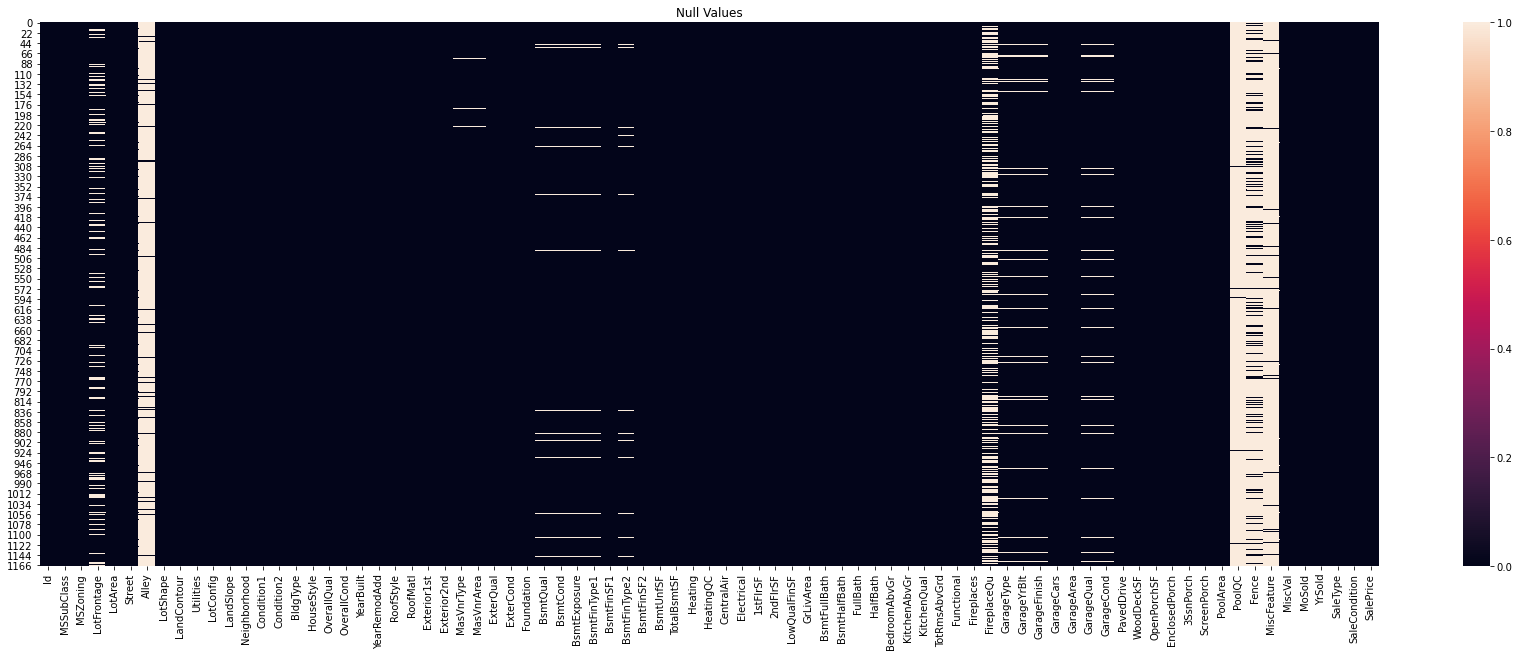

In [12]:
#Visualizing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# Observations
- Those columns with more than 50% (584 entries) null values can be dropped to avoid unncessary issue for model development.
- Those columns with less than 50% (584 entries) null values can be treated using imputation techniques.
- The column FireplaceQu has 551 null values, which accounts to 50% approximately can also be dropped

In [13]:
#Dropping all the unnecessary columns from the dataset
df = df.drop(["Alley"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Fence"],axis=1)
df = df.drop(["MiscFeature"],axis=1)
df = df.drop(["Id"],axis=1)
df = df.drop(["Utilities"],axis=1)
df = df.drop(["FireplaceQu"],axis=1)

In [14]:
#Checking the value count of each column to see if there are any unexpected and unwanted entries present in the column in train dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('-'* 50)

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
--------------------------------------------------
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
--------------------------------------------------
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64
--------------------------------------------------
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64
--------------------------------------------------
Pave    1164
Grvl       4
Name: Street, dtype: int64
--------------------------------------------------
Reg    740
IR1    390
IR2     3

140000    18
135000    16
155000    12
160000    11
139000    11
          ..
103600     1
238000     1
185500     1
132250     1
176485     1
Name: SalePrice, Length: 581, dtype: int64
--------------------------------------------------


# Observations
- There are no unnecessary or duplicate entries in any column of the train dataset.
- There are zero values as entries in some columns which are below 60%, hence they are acceptable and reasonable.
- But there are 85% zero values as entries in the following columns

    - BsmtFinSF2
    - LowQualFinSF
    - EnclosedPorch
    - 3SsnPorch
    - ScreenPorch
    - PoolArea
    - MiscVal

So lets drop these columns.

In [15]:
#Dropping unnecessary columns in train dataset
df.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [16]:
#Checking for null values in the train dataset again
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 67, dtype: int64

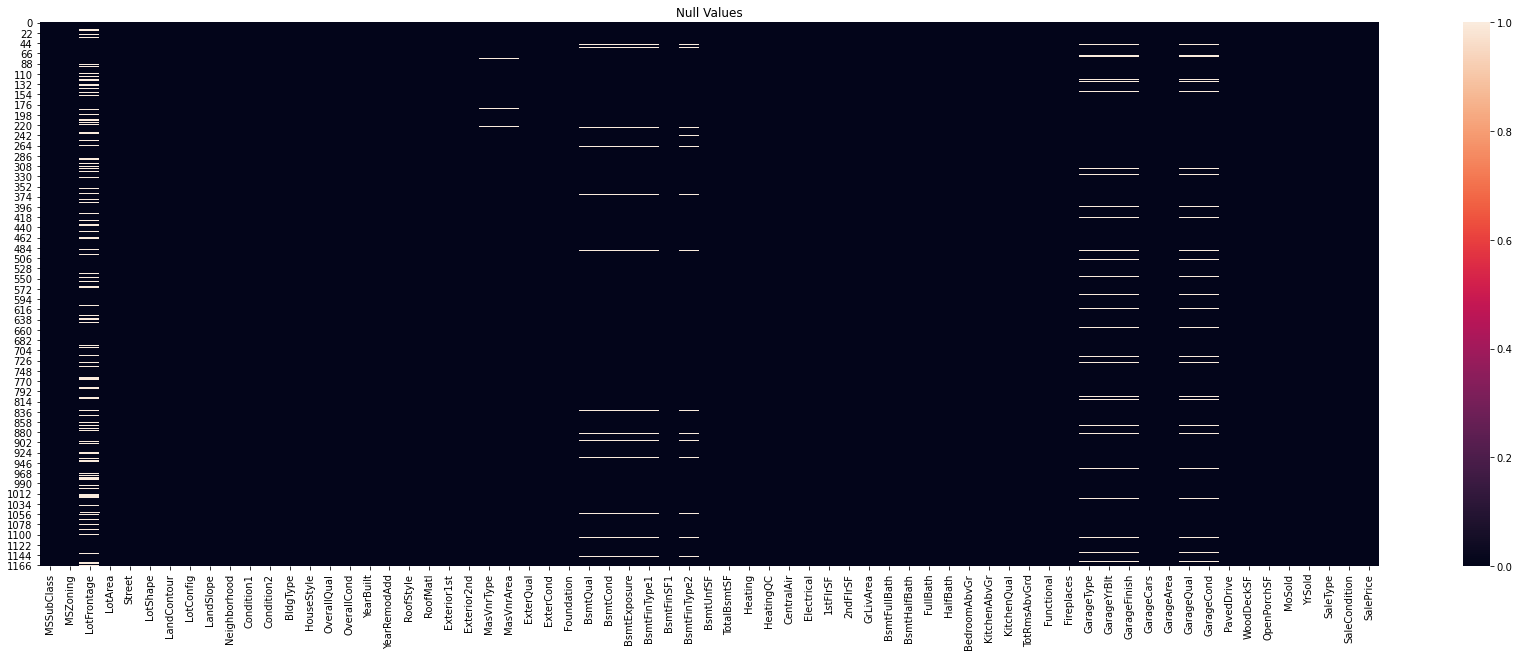

In [17]:
#Visualizing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# Observations
We can observe that there are null values in most of the columns of the train dataset. We need to treat them using appropriate imputation techniquesand fill them with their respective values.

# Imputation

In [18]:
#Creating a list of categorical and numerical datatypes in train dataset
df_categorical=[]
df_numerical=[]
for col in df.columns:
    if (df[col].dtype=='object'):
          df_categorical.append(col)
    else:
        df_numerical.append(col)

In [19]:
#Replacing null values of categorical column with mode of that column in train dataset.
catcol=df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)


In [20]:
#Replacing null values of numerical column with mean of that column in train dataset.
numcol=df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)

Replaced all the null values in Numerical columns and categorical coumns of the train dataset.

In [21]:
#Checking for null values again in train dataset
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 67, dtype: int64

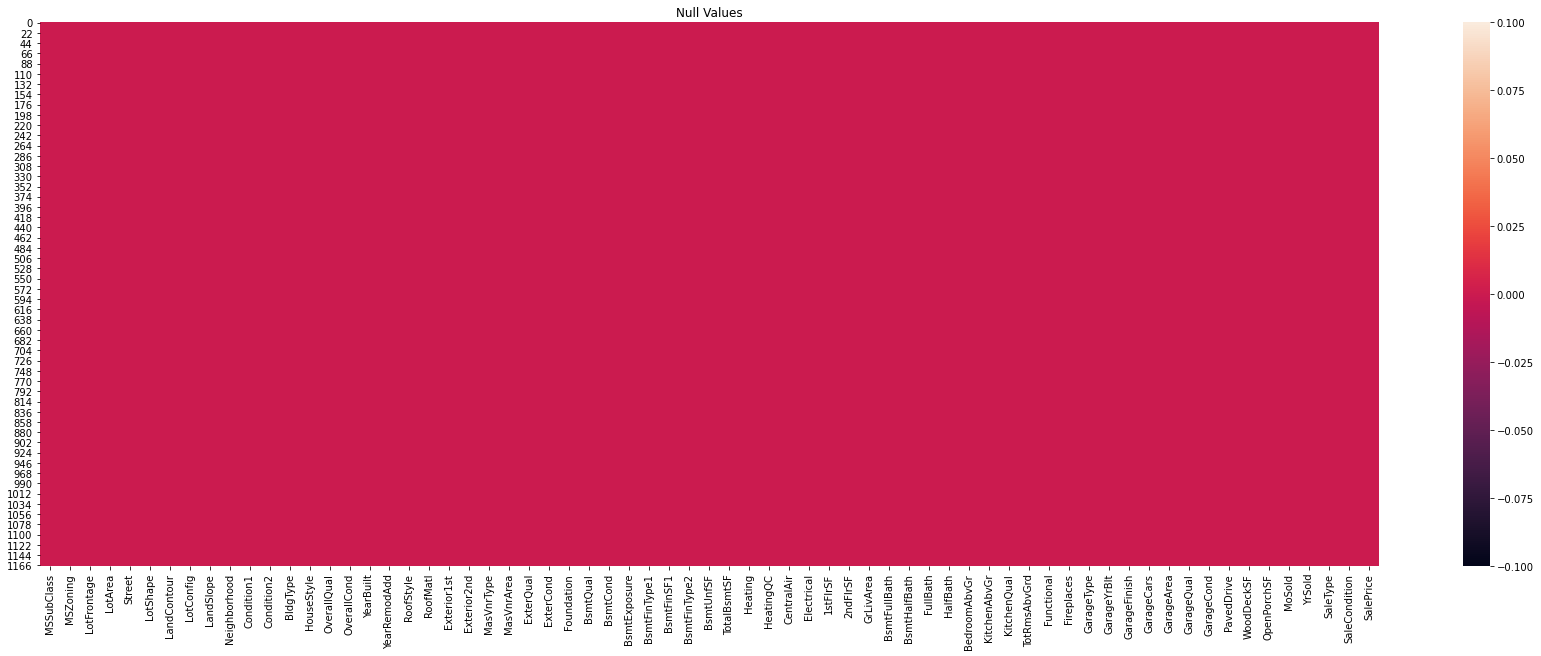

In [22]:
#Visualizing null values again after imputation in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We can see that there are no null values in the data

In [23]:
#Checking for empty observations in target column
df.loc[df['SalePrice'] == " "]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

There are no empty observations in the target column of train dataset.

# Feature Extraction:

In [24]:
# Converting years column to age column in train dataset
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [25]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

We have converted all the year columns to their respective age, as age helps us more than year Built in the dataset.

In [26]:
#Checking description of data set in train dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

           SalePrice  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count    1168.000000      1168.000000           1168.000000     1168.000000   
mean   181477.005993        39.069349             25.241438        2.195205   
std     79105.586863        30.145255             20.785185        1.329738   
min     34900.000000         0.000000              0.000000        0.000000   
25%    130375.000000        10.000000              6.000000        1.000000   
50%    163995.000000        38.000000             17.000000        2.000000   
75%    215000.000000        56.000000             44.0000

# Observations
- Big difference between max value and 75% in SalePrice, MSSubClass, LotFrontage, LotArea, BsmtFinSF1, BsmtF inSF2, etc indicates presence of outliers.
- A higher std than mean in columns:
    - MasVnrArea
    - BsmtFinSF1
    - BsmtFinSF2
    - WoodDeckSF
- OpenPorc hSF,EnclosedPorch,3SsnPorch etc indicates presence of skewness.
- An Anomaly is displayed in the relationship between age of house and SalePrice. There is a general negative relationship between House age and Sale Price, ie. increase in age leads to a decrease in SalePrice. however, houses built between 1880 and 1900 sold for the highest. The assumption made in this regard is that those houses were sold for the highest amount because of their antiquity value.

Now let's proceed to EDA on the test dataset

In [27]:
#Checking shape of my test dataset
dff.shape

(292, 80)

The test dataset has 292 rows and 80 columns.

In [28]:
#Checking all column names of train dataset
dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the test dataset. The test dataset does not have the target column salePrice unline the train dataset

In [29]:
#Checking the data types of all columns in test dataset
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

The test dataset has int, object as well as float data types.

In [30]:
#Checking the info about the test dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Observations
Above is the info about test dataset from which we can observe that 
- There are some missing values in the dataset, which needs to be filled using imputation techniques.
- And in Alley, PoolQC, Fence and MiscFeature has more than 80% null values so we may drop these columns in the further steps

In [31]:
#Checking unique values of each column in test dataset
dff.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
                ... 
MiscVal            8
MoSold            12
YrSold             5
SaleType           6
SaleCondition      4
Length: 80, dtype: int64

# Observations
- In Id column the unique count is 1168 which means all the values in the column are unique and ID is the identity number given for perticular asset so this ID has no purpose in developing a model and training. Hence it can be dropped.
- In Utilities column unique value count is 1 which means all the entries are same this also has no purpose in model building so this column can also be dropped.

In [32]:
#Checking null values in the test dataset
dff.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

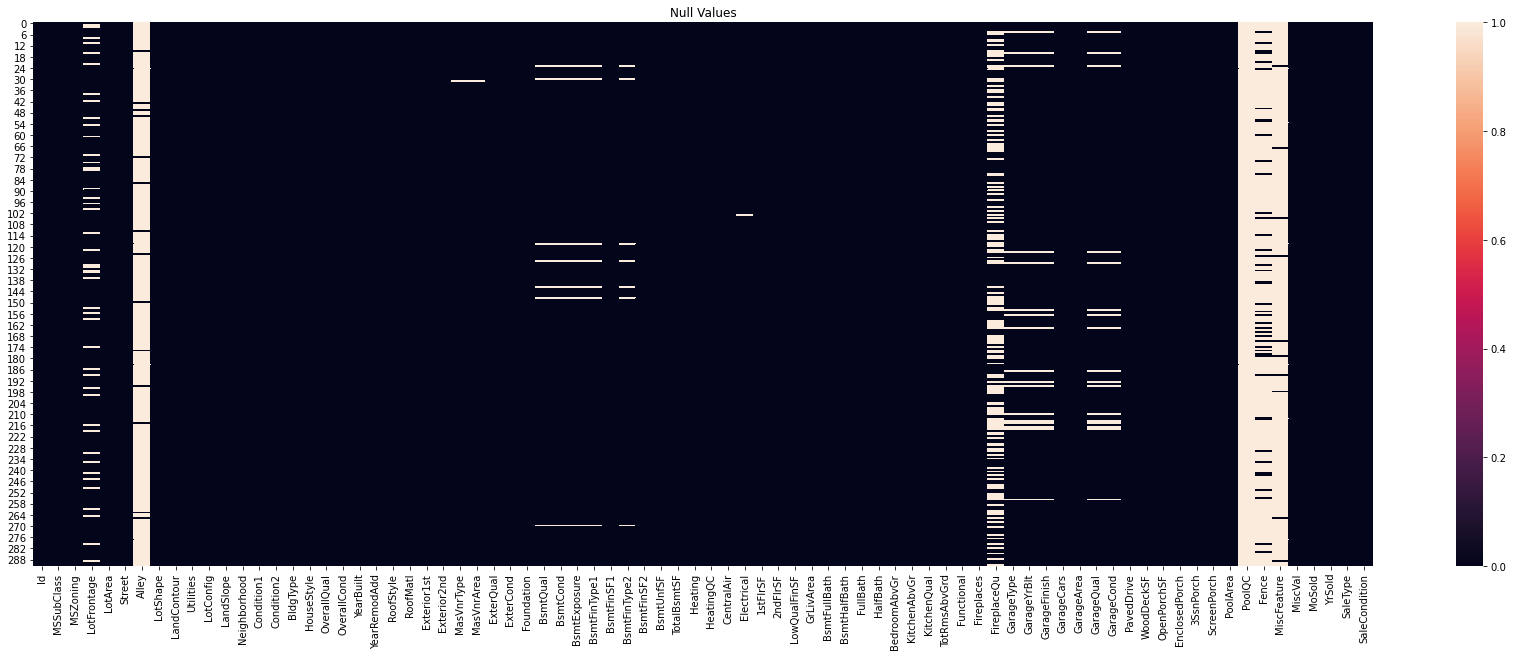

In [33]:
#Visualizing null values in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

# Observations
- Those columns with more than 50% (584 entries) null values can be dropped to avoid unncessary issue for model development.
- Those columns with less than 50% (584 entries) null values can be treated using imputation techniques.
- The column FireplaceQu has 551 null values, which accounts to 50% approximately can also be dropped

In [34]:
#Dropping all the unnecessary columns from the dataset
dff = dff.drop(["Alley"],axis=1)
dff = dff.drop(["PoolQC"],axis=1)
dff = dff.drop(["Fence"],axis=1)
dff = dff.drop(["MiscFeature"],axis=1)
dff = dff.drop(["Id"],axis=1)
dff = dff.drop(["Utilities"],axis=1)
dff = dff.drop(["FireplaceQu"],axis=1)

In [35]:
#Checking the value count of each column to see if there are any unexpected and unwanted entries present in the column in train dataset.
for i in dff.columns:
        print(dff[i].value_counts())
        print('-'* 50)

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
40       1
85       1
Name: MSSubClass, dtype: int64
--------------------------------------------------
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
--------------------------------------------------
60.0    32
85.0    14
50.0    13
70.0    12
21.0     9
        ..
45.0     1
77.0     1
69.0     1
33.0     1
61.0     1
Name: LotFrontage, Length: 65, dtype: int64
--------------------------------------------------
7200      7
1680      4
9600      3
10800     3
7500      3
         ..
10998     1
6853      1
14536     1
215245    1
14720     1
Name: LotArea, Length: 249, dtype: int64
--------------------------------------------------
Pave    290
Grvl      2
Name: Street, dtype: int64
--------------------------------------------------
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int6

# Observations
- There are no unnecessary or duplicate entries in any column of the train dataset.
- There are zero values as entries in some columns which are below 60%, hence they are acceptable and reasonable.
- But there are 85% zero values as entries in the following columns

    - BsmtFinSF2
    - LowQualFinSF
    - EnclosedPorch
    - 3SsnPorch
    - ScreenPorch
    - PoolArea
    - MiscVal

So lets drop these columns.

In [36]:
#Dropping unnecessary columns in test dataset
dff.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [37]:
#Checking for null values in the test dataset again
dff.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
OpenPorchSF       0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 66, dtype: int64

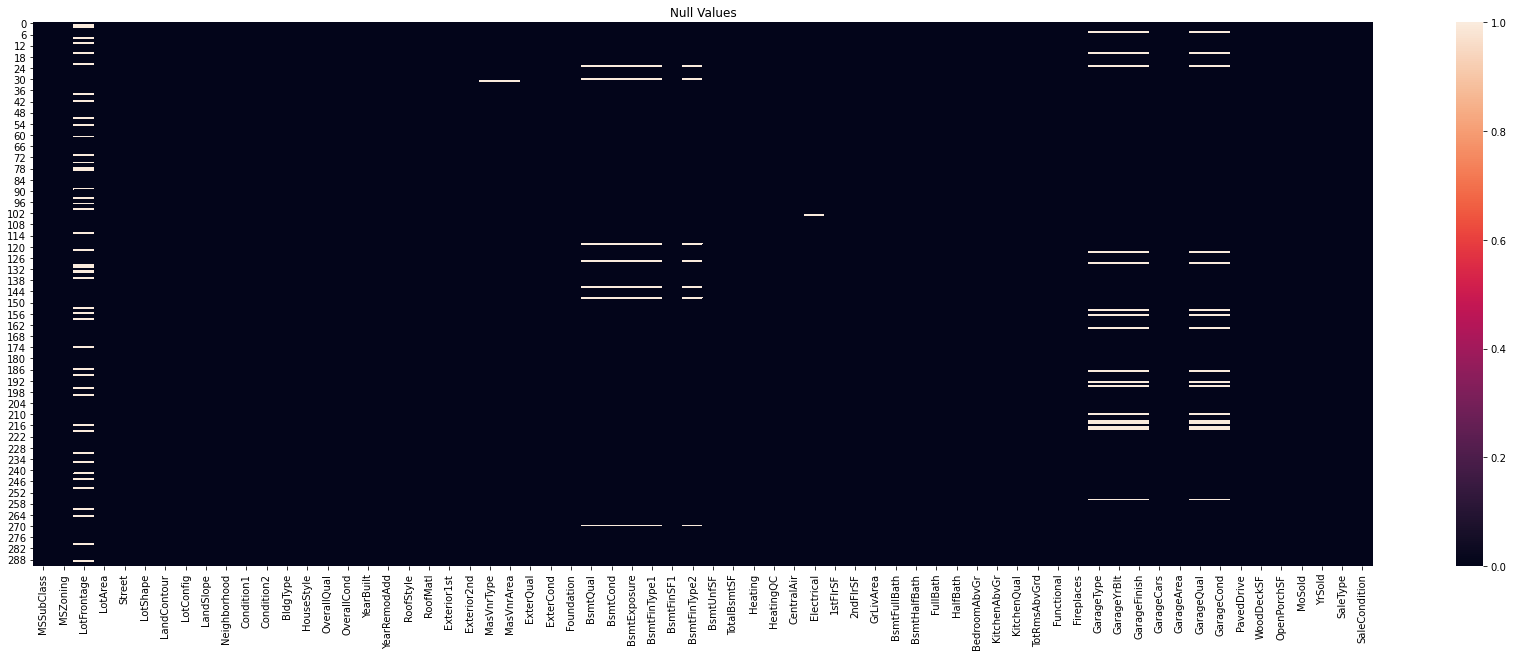

In [38]:
#Visualizing null values in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

# Observations
We can observe that there are null values in most of the columns of the train dataset. We need to treat them using appropriate imputation techniquesand fill them with their respective values.

# Imputation

In [39]:
#Creating a list of categorical and numerical datatypes in test dataset
dff_categorical=[]
dff_numerical=[]
for col in dff.columns:
    if (dff[col].dtype=='object'):
          dff_categorical.append(col)
    else:
        dff_numerical.append(col)

In [40]:
#Replacing null values of categorical column with mode of that column in test dataset.
catcol1=dff.columns.values
for i in range(0,len(catcol1)):
    if dff[catcol1[i]].dtype == "object":
        dff[catcol1[i]].fillna(dff[catcol1[i]].mode()[0], inplace=True)

In [41]:
#Replacing null values of numerical column with mean of that column in test dataset.
numcol1=dff.columns.values
for i in range(0,len(numcol1)):
    if dff[numcol1[i]].dtype != "object":
        dff[numcol1[i]].fillna(dff[numcol1[i]].mean(), inplace=True)

Replaced all the null values in Numerical columns and categorical coumns of the test dataset.

In [42]:
#Checking for null values again in train dataset
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 66, dtype: int64

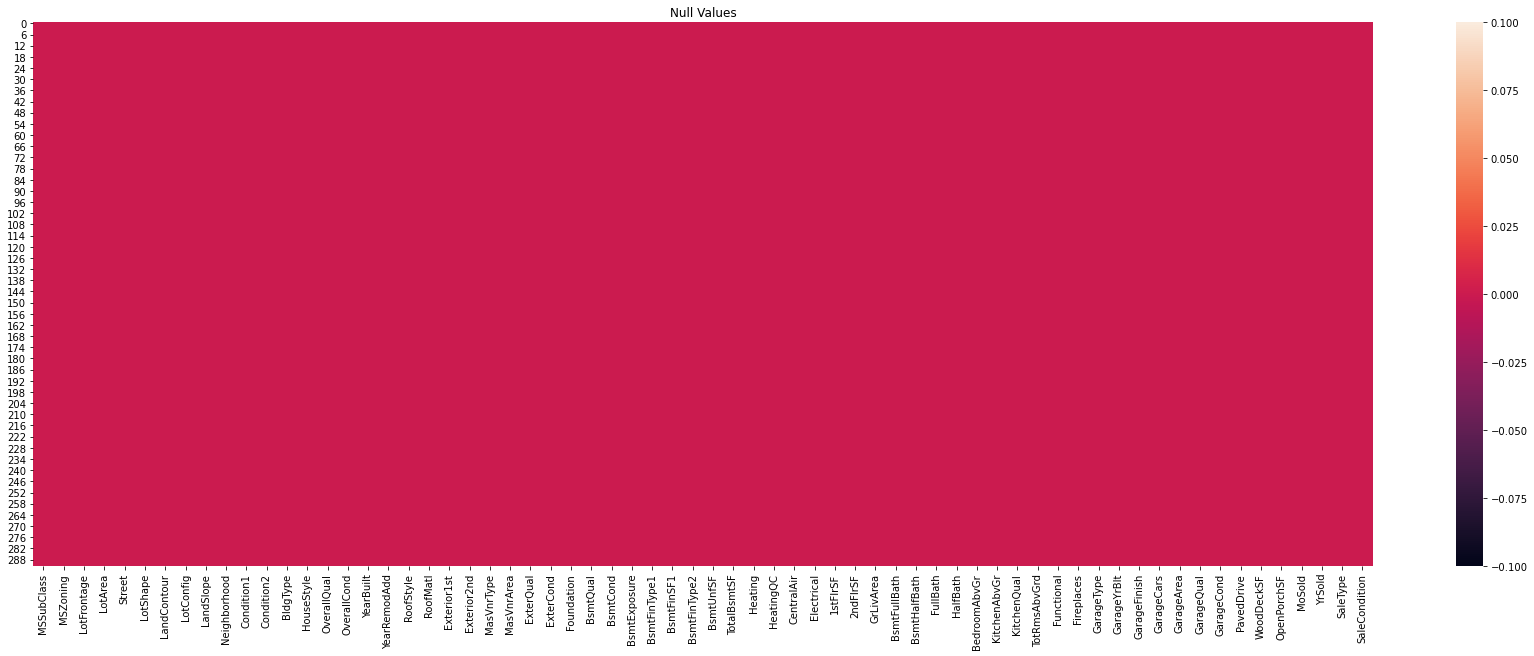

In [43]:
#Visualizing null values again after imputation in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

We can see that there are no null values in the data

# Feature Extraction:

In [44]:
# Converting years column to age column in test dataset
dff['Year_SinceBuilt'] = dff['YearBuilt'].max() - dff['YearBuilt']
dff['Year_SinceRemodAdded'] = dff['YearRemodAdd'].max() - dff['YearRemodAdd']
dff['Year_SinceSold'] = dff['YrSold'].max() - dff['YrSold']
dff['GarageAge'] = dff['GarageYrBlt'].max() - dff['GarageYrBlt']

In [45]:
# Dropping old columns in test dataset
dff.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

We have converted all the year columns to their respective age, as age helps us more than year Built in the dataset.

In [46]:
#Checking description of data set in test dataset
dff.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

       Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold   GarageAge  
count       292.000000            292.000000      292.000000  292.000000  
mean         36.383562             24.705479        2.140411   30.240000  
std          30.447016             20.105792        1.322867   23.161183  
min           0.000000              0.000000        0.000000    0.000000  
25%           8.000000              6.750000        1.000000    8.000000  
50%          33.000000             16.000000        2.000000   30.240000  
75%          55.000000             42.000000        3.000000   45.000000  
max         137.000000             60.000000        4.000000   94.000000

# Observations:
- Big difference between max value and 75% in SalePrice,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2, etc indicates presence of outliers.

- Higher std than mean in columns: MasVnrArea,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch etc indicates presence of skewness.

# Visualization:

## Univariate Analysis:

In [47]:
# checking for categorical columns in train dataset
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the categorical columns in the train dataset.

In [48]:
# checking for categorical columns in test dataset
categorical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the categorical columns in the test dataset.

In [49]:
# Now checking for numerical columns in train dataset
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

In [50]:
# Now checking for numerical columns in test dataset
numerical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

### Univariate analysis for numerical columns:

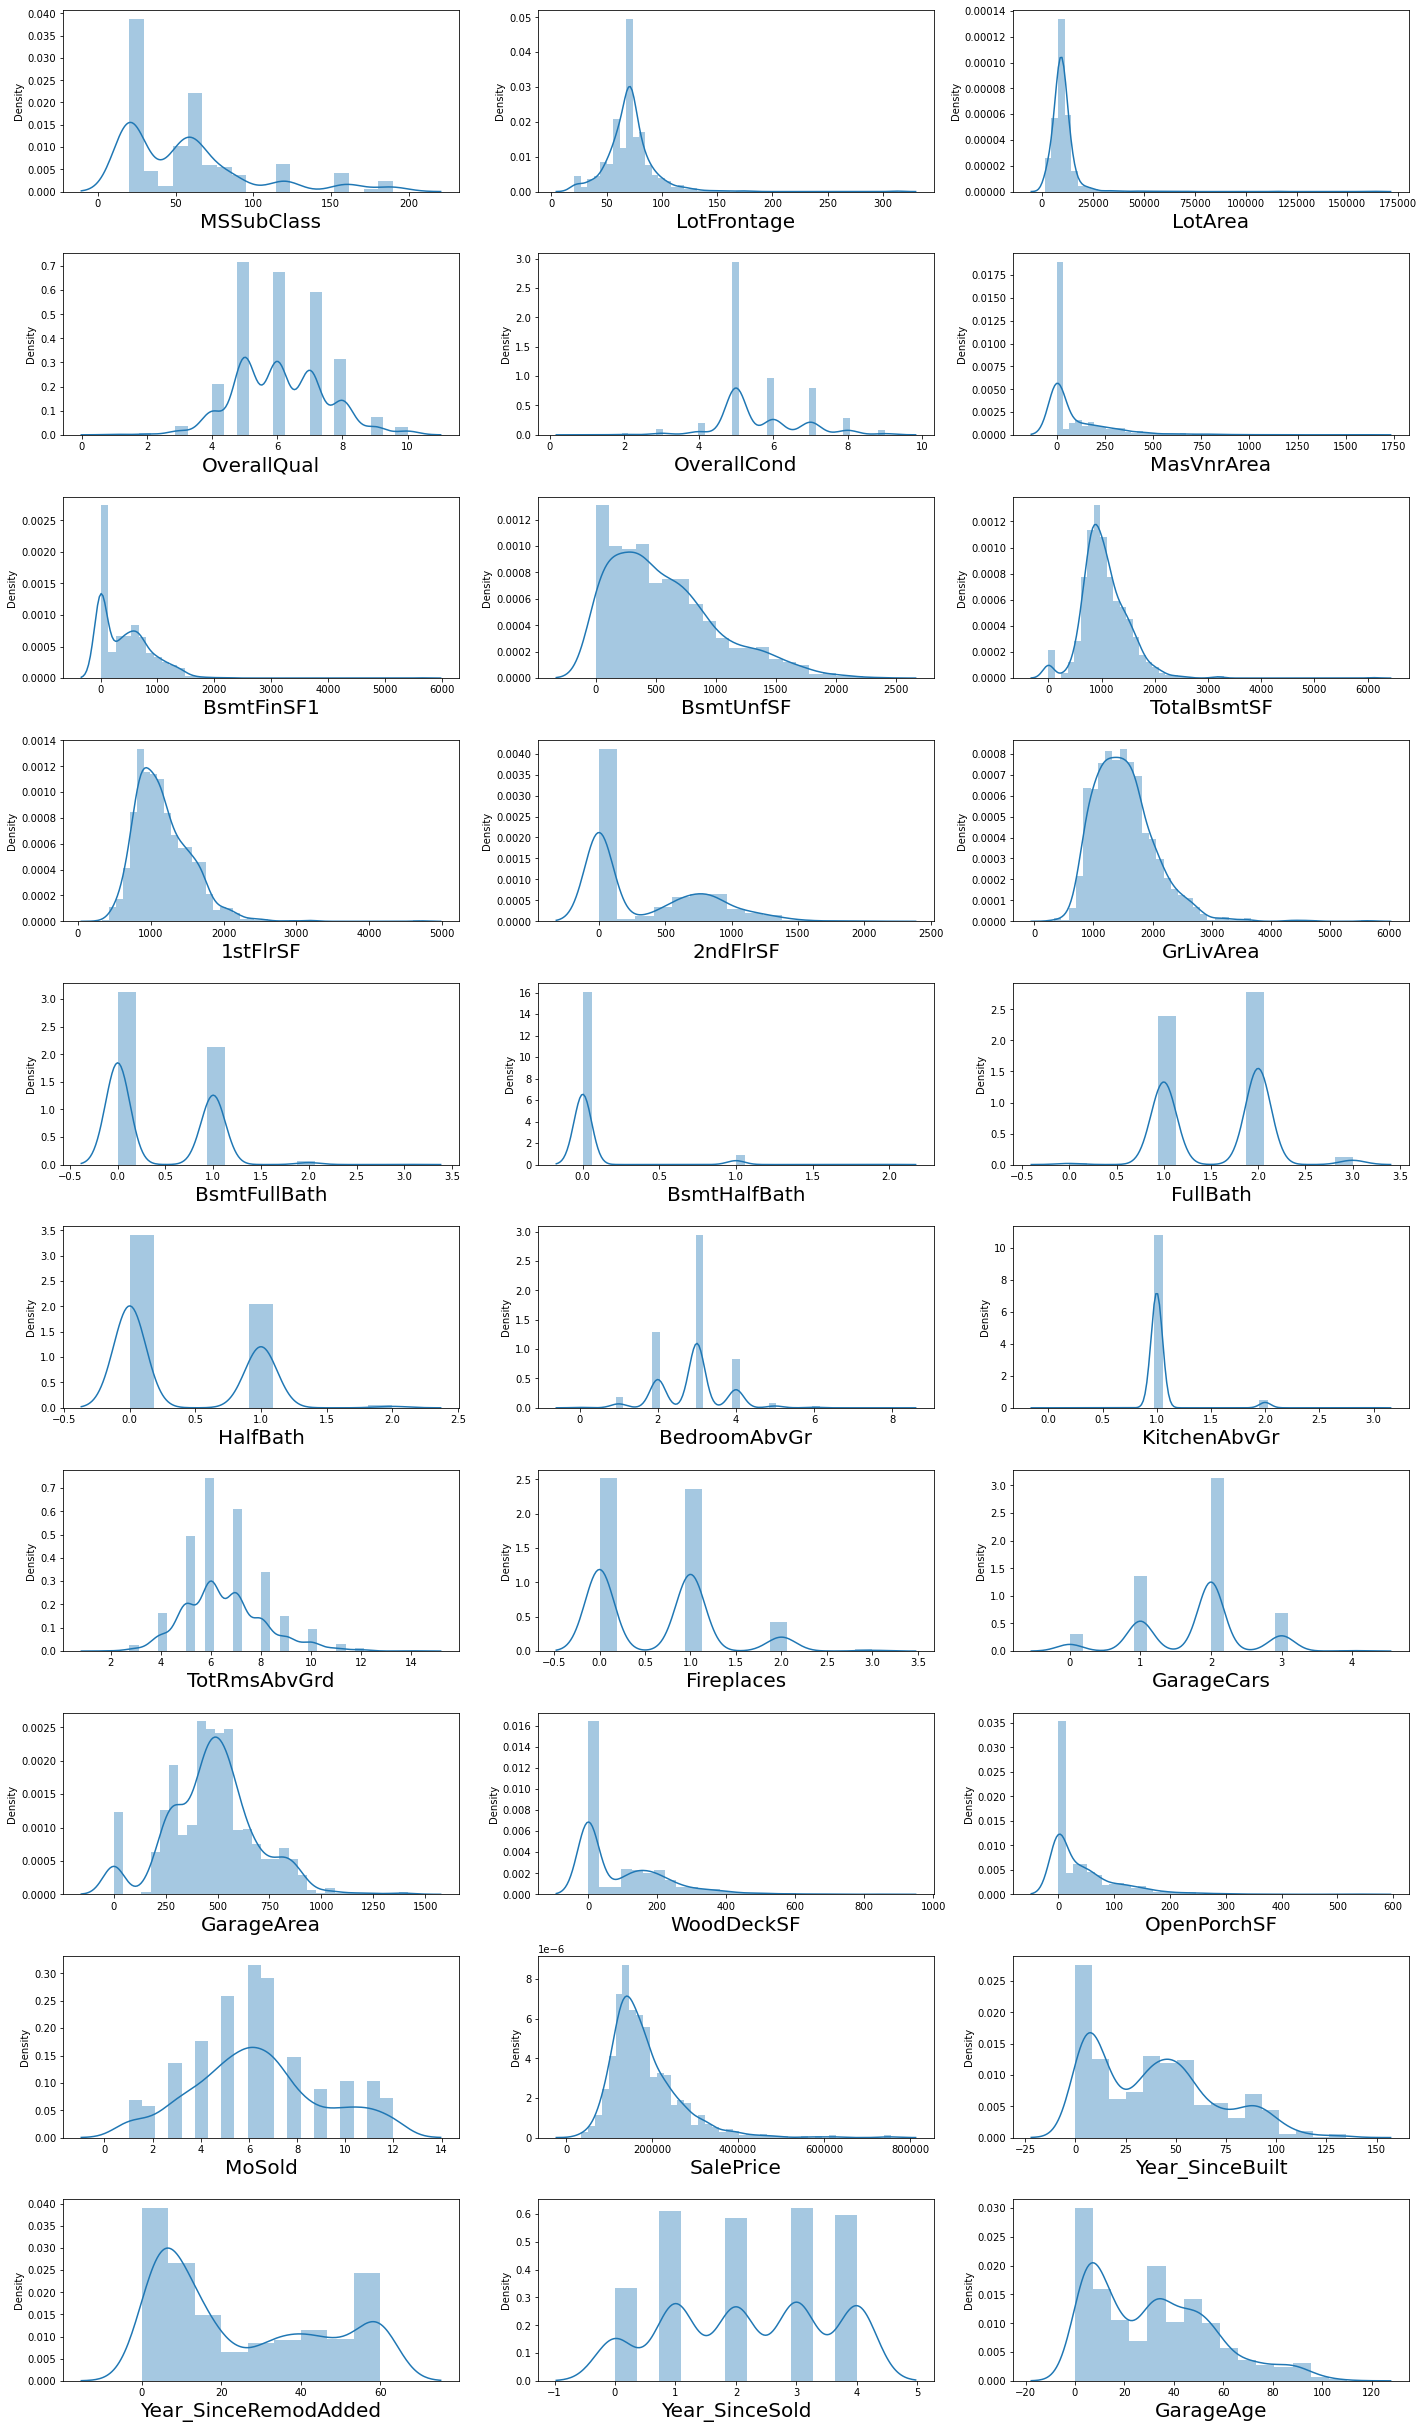

In [51]:
#Distribution plot for all numerical columns
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

There is skewness in almost all numerical columns.We have to remove this skewness.

### Univariate analysis for categorical columns:

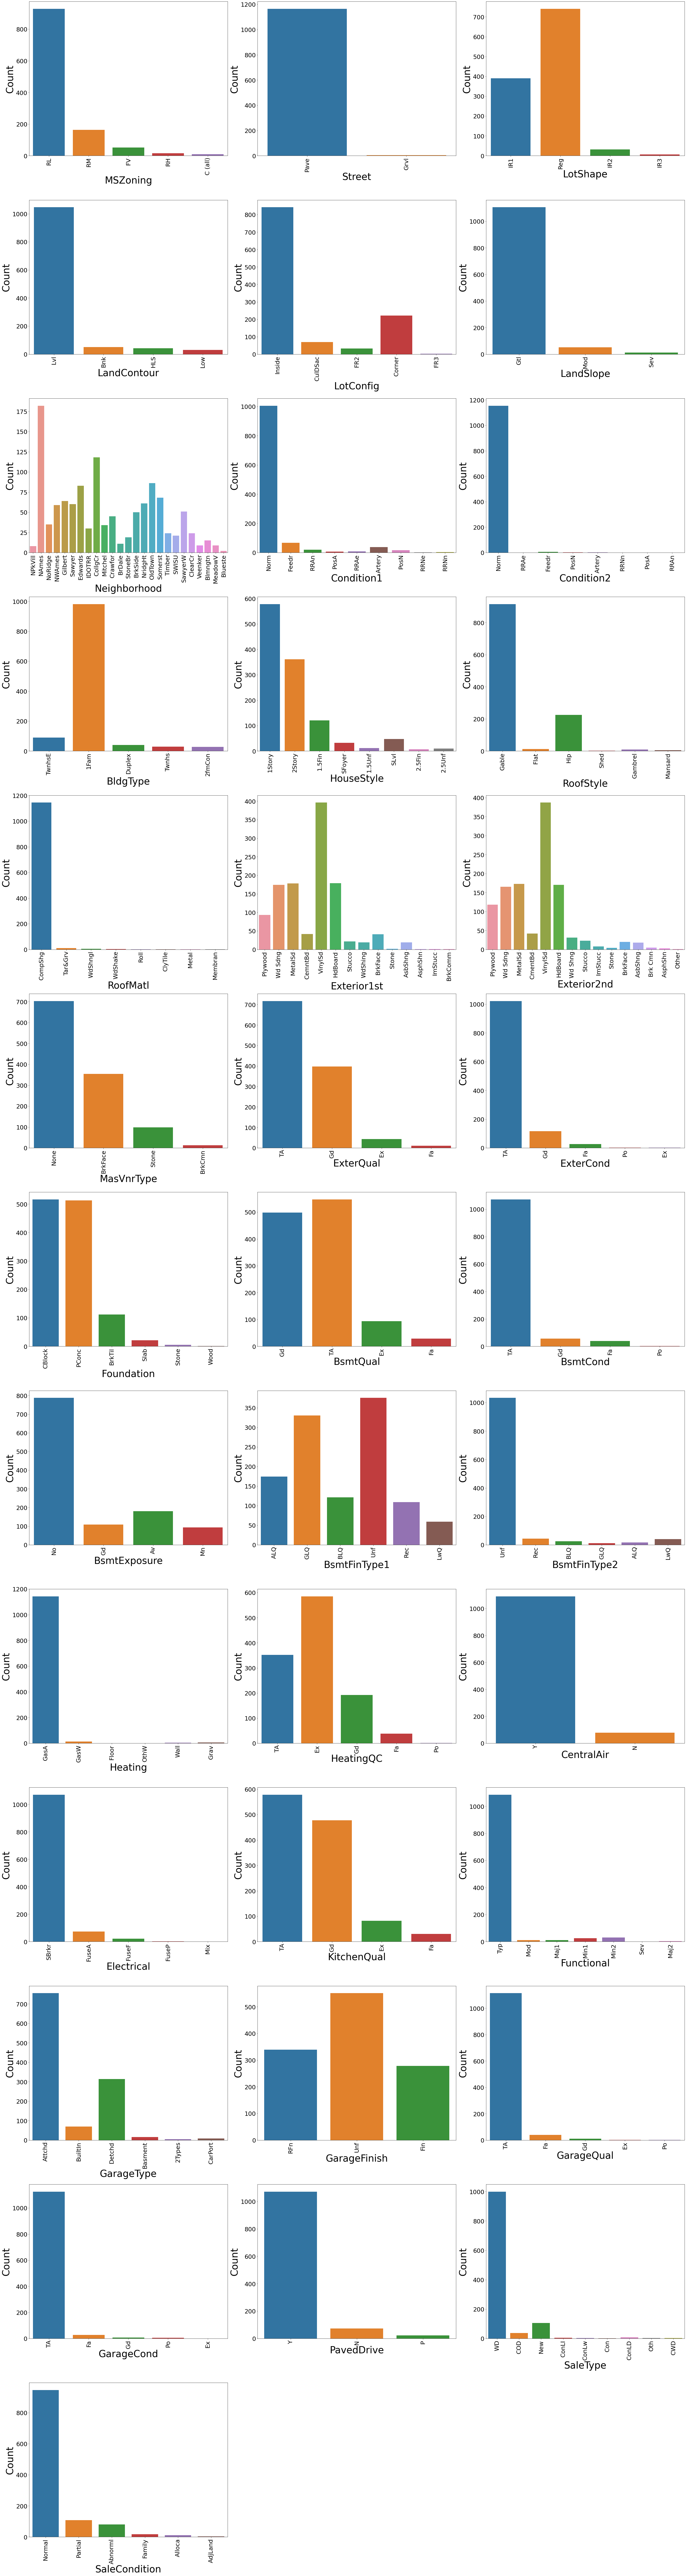

In [52]:
#Bar plot for all categorical columns
plt.figure(figsize = (40,150))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 25)
        plt.yticks(rotation=0,fontsize = 25)
        plt.xlabel(column,fontsize = 40)
        plt.ylabel('Count',fontsize = 40)
    plotnumber+=1
plt.tight_layout()

# Observations:

- It is found that Residential Low Density zoning has maximum count, for the feature general zoning classification of the sale(MSZoning).
- In Paved streets we can observe maximum count, for the feature Type of road access to property(Street).
- Regular shaped property has maximum count, for the feature General shape of property(LotShape).
- Near Flat/Level property has maximum count, for the feature Flatness of the property(LandContour).
- Inside lot configured property has maximum count, for the feature Lot configuration(LotConfig).
- Gentle sloped property has maximum count, for the feature Slope of property(LandSlope).
- If the property is located in North Ames then count is good compared to other locations, for the feature Physical locations within Ames city limits(Neighborhood).
- If the Proximity to various conditions-1 is normal then count is high for the feature Proximity to various conditions(Condition1).
- If the Proximity to various conditions-2 is normal then count is high for the feature Proximity to various conditions (if more than one is present)(Condition2).
- Single-family Detached dwelling has maximum count for the feature Type of dwelling(BldgType).
- One story dwelling housestyle has maximum count for the feature Style of dwelling(HouseStyle).
- For Gable roof style the count is high for the feature Type of roof(RoofStyle).
- For Standard (Composite) Shingle roof material the count is high for the feature Roof material(RoofMatl).
- For Vinyl Siding exterior-1 covering on house has maximum counts for the feature Exterior covering on house(Exterior1st).
- For Vinyl Siding exterior-2 covering on house has maximum counts for the feature Exterior covering on house (if more than one material)(Exterior2nd).
- For Masonry veneer type(MasVnrType) None has maximum count.
- For Typical/Average(TA) quality of the material on the exterior has maximum count, for the feature Evaluates the quality of the material on the exterior (ExterQual).
- For Typical/Average(TA) condition of the material on the exterior has maximum count for the feature Evaluates the present condition of the material on the exterior(ExterCond).
- For Cinder Block and Poured Contrete foundations the count is maximum for the feature Type of foundation(Foundation). 
- For unfinished Rating of basement finished area-1 the count is maximum for the feature Rating of basement finished area(BsmtFinType1).
- For unfinished Rating of basement finished area-2 the count is maximum for the feature Rating of basement finished area (if multiple types)(BsmtFinType2).
- For Gas forced warm air furnace type of heating the count is maximum for the feature Type of heating(Heating).
- For Excellent Heating quality and condition the count is high for the feature Heating quality and condition(HeatingQC).
- For Central air conditioning-yes has maximum count for the feature Central air conditioning(CentralAir).
- For Standard Circuit Breakers & Romex Electrical system the count is high for the feature Electrical system(Electrical).
- For Typical/Average(TA) and good Kitchen quality the count is maximum for the feature Kitchen quality(KitchenQual).
- Typical Functionality has highest count for Home functionality (Assume typical unless deductions are warranted)(Functional).
- For good Fireplace quality the count is high for the feature Fireplace quality(FireplaceQu).
- If Garage location Attached to home then the count is high, for the feature Garage location(GarageType).
- For Unfinished Interior of the garage the count is maximum, for the feature Interior finish of the garage(GarageFinish).
- For Typical/Average(TA) Garage quality the count is high, for the feature Garage quality(GarageQual).
- For Typical/Average(TA) Garage condition the count is high, for the feature Garage condition(GarageCond).
- For Paved driveway the count is maximum, for the feature Paved driveway(PavedDrive).
- For Warranty Deed - Conventional type of sales the count is maximum, for the feature Type of sale(SaleType).
- For Normal sales condition the count is high, for the feature Condition of sale(SaleCondition).

## Bivariate Analysis:

### Bivariate Analysis for numerical columns:

In [53]:
col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded','GarageAge']

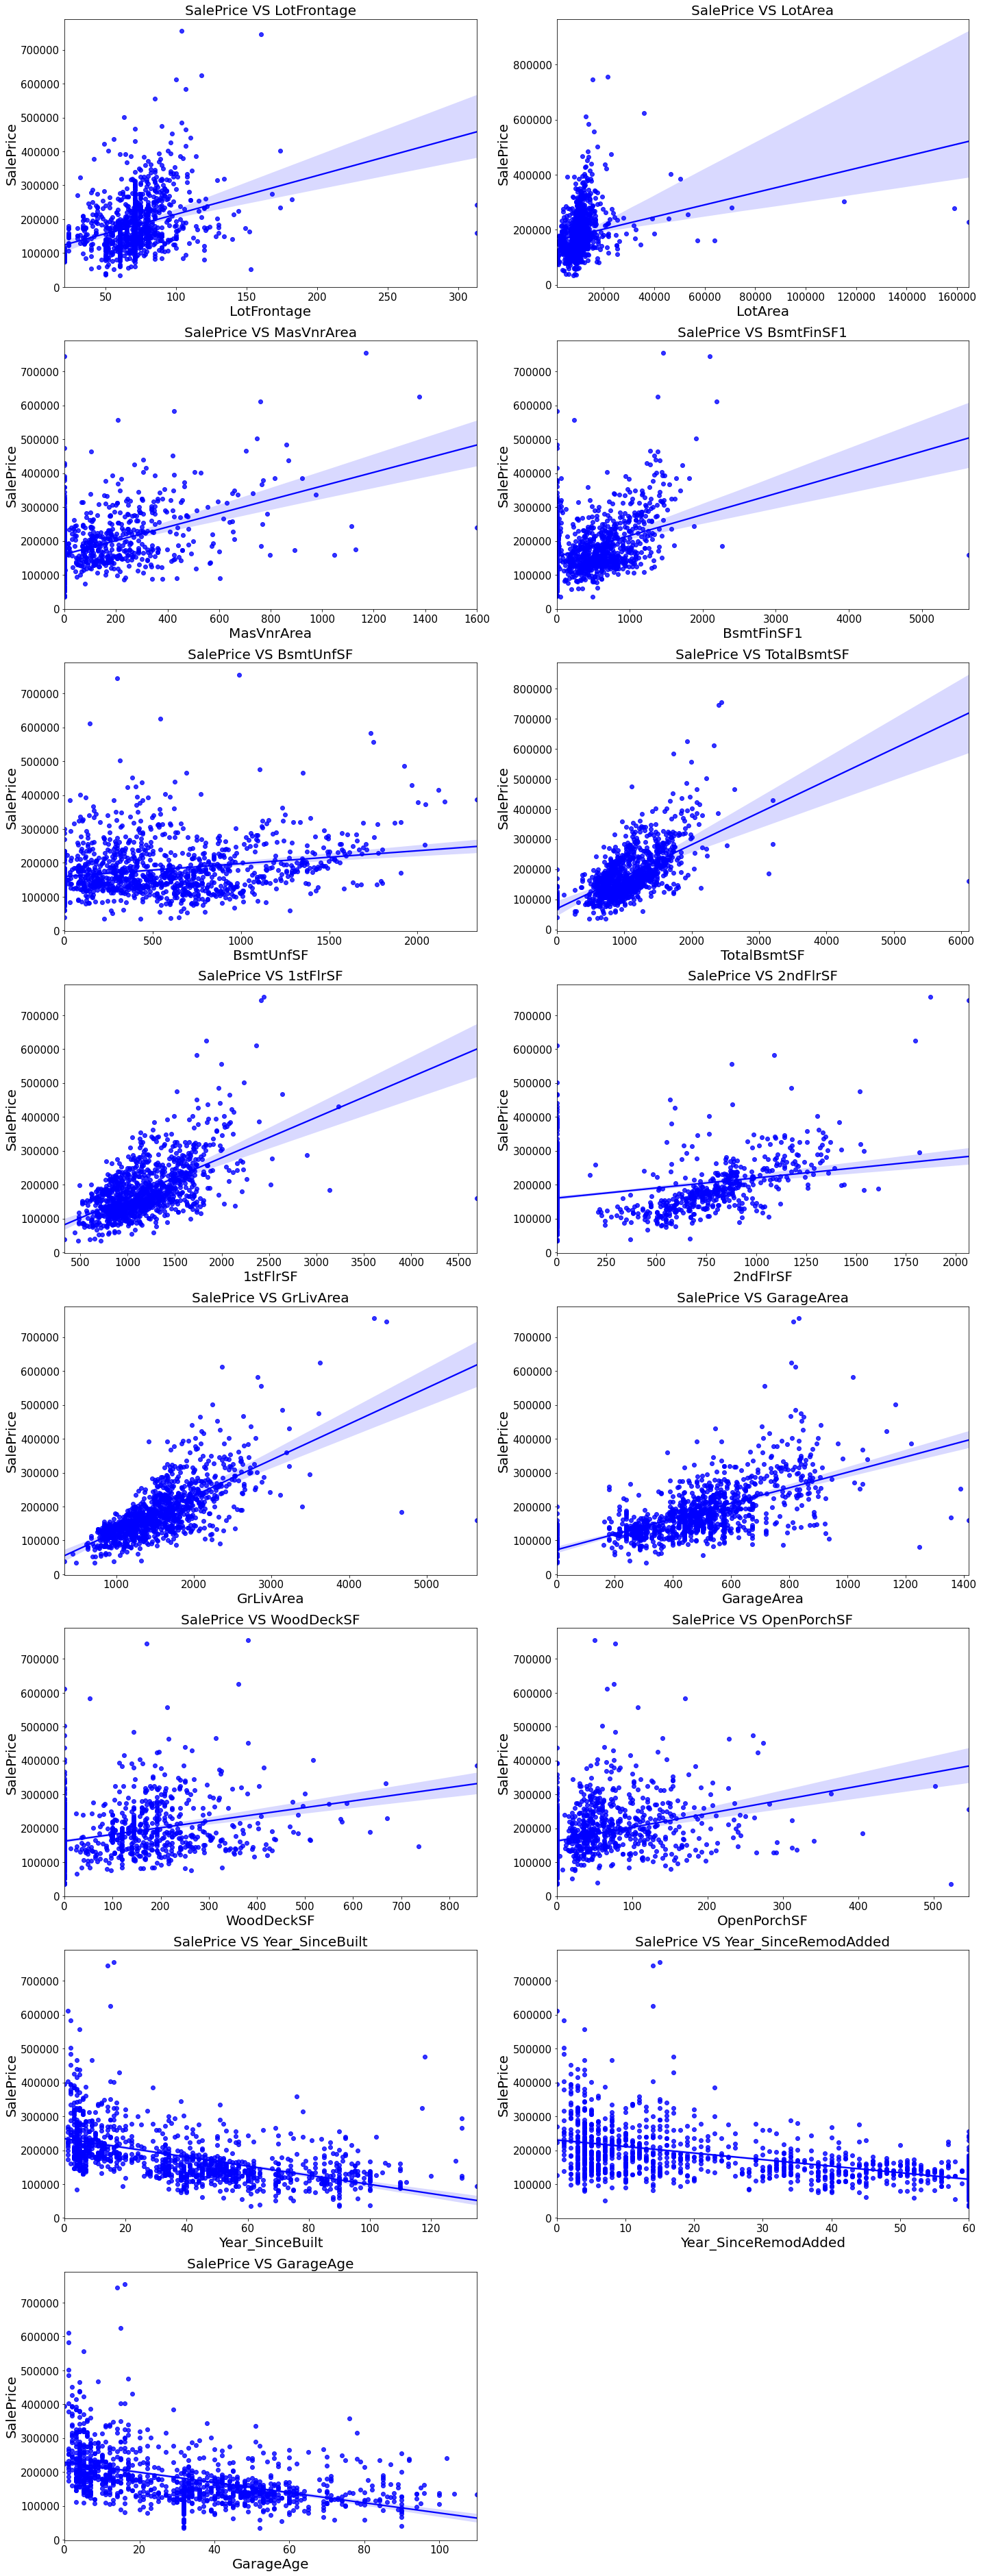

In [54]:
#regplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="b")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

# Observations:

- As Linear feet of street connected to property(LotFrontage) is increseing sales is decreasing and the SalePrice is rangeing between 0-3 lakhs.
- As Lot size in square feet(LotArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- As Masonry veneer area in square feet(MasVnrArea) is increasing sales is decreasing and saleprice is rangeing between 0-4 lakhs.
- As Type 1 finished square feet(BsmtFinSF1) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- As Unfinished square feet of basement area(BsmtUnfSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs. There are some outliers also.
- As Total square feet of basement area(TotalBsmtSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- As First Floor square feet(1stFlrSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- As Second floor square feet(2ndFlrSF) is increseing sales is increasing in the range 500-1000 and the saleprice is in between 0-4 lakhs.
- As Above grade (ground) living area square feet(GrLivArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- As Size of garage in square feet(GarageArea) is increseing sales is increseing and the saleprice is in between 0-4 lakhs.
- As Wood deck area in square feet(WoodDeckSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- As Open porch area in square feet(OpenPorchSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- As Year_SinceBuilt is increseing sales is decreasing and the saleprice is high for newly built building and the sales price is in between 0-4 lakhs.
- As Since Remodel date (same as construction date if no remodeling or additions)(Year_SinceRemodAdded) is increseing sales is decreasing and the saleprice is in between 1-4 lakhs.
- As Since Year garage was built(GarageAge) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

In [55]:
col1=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','Year_SinceSold']

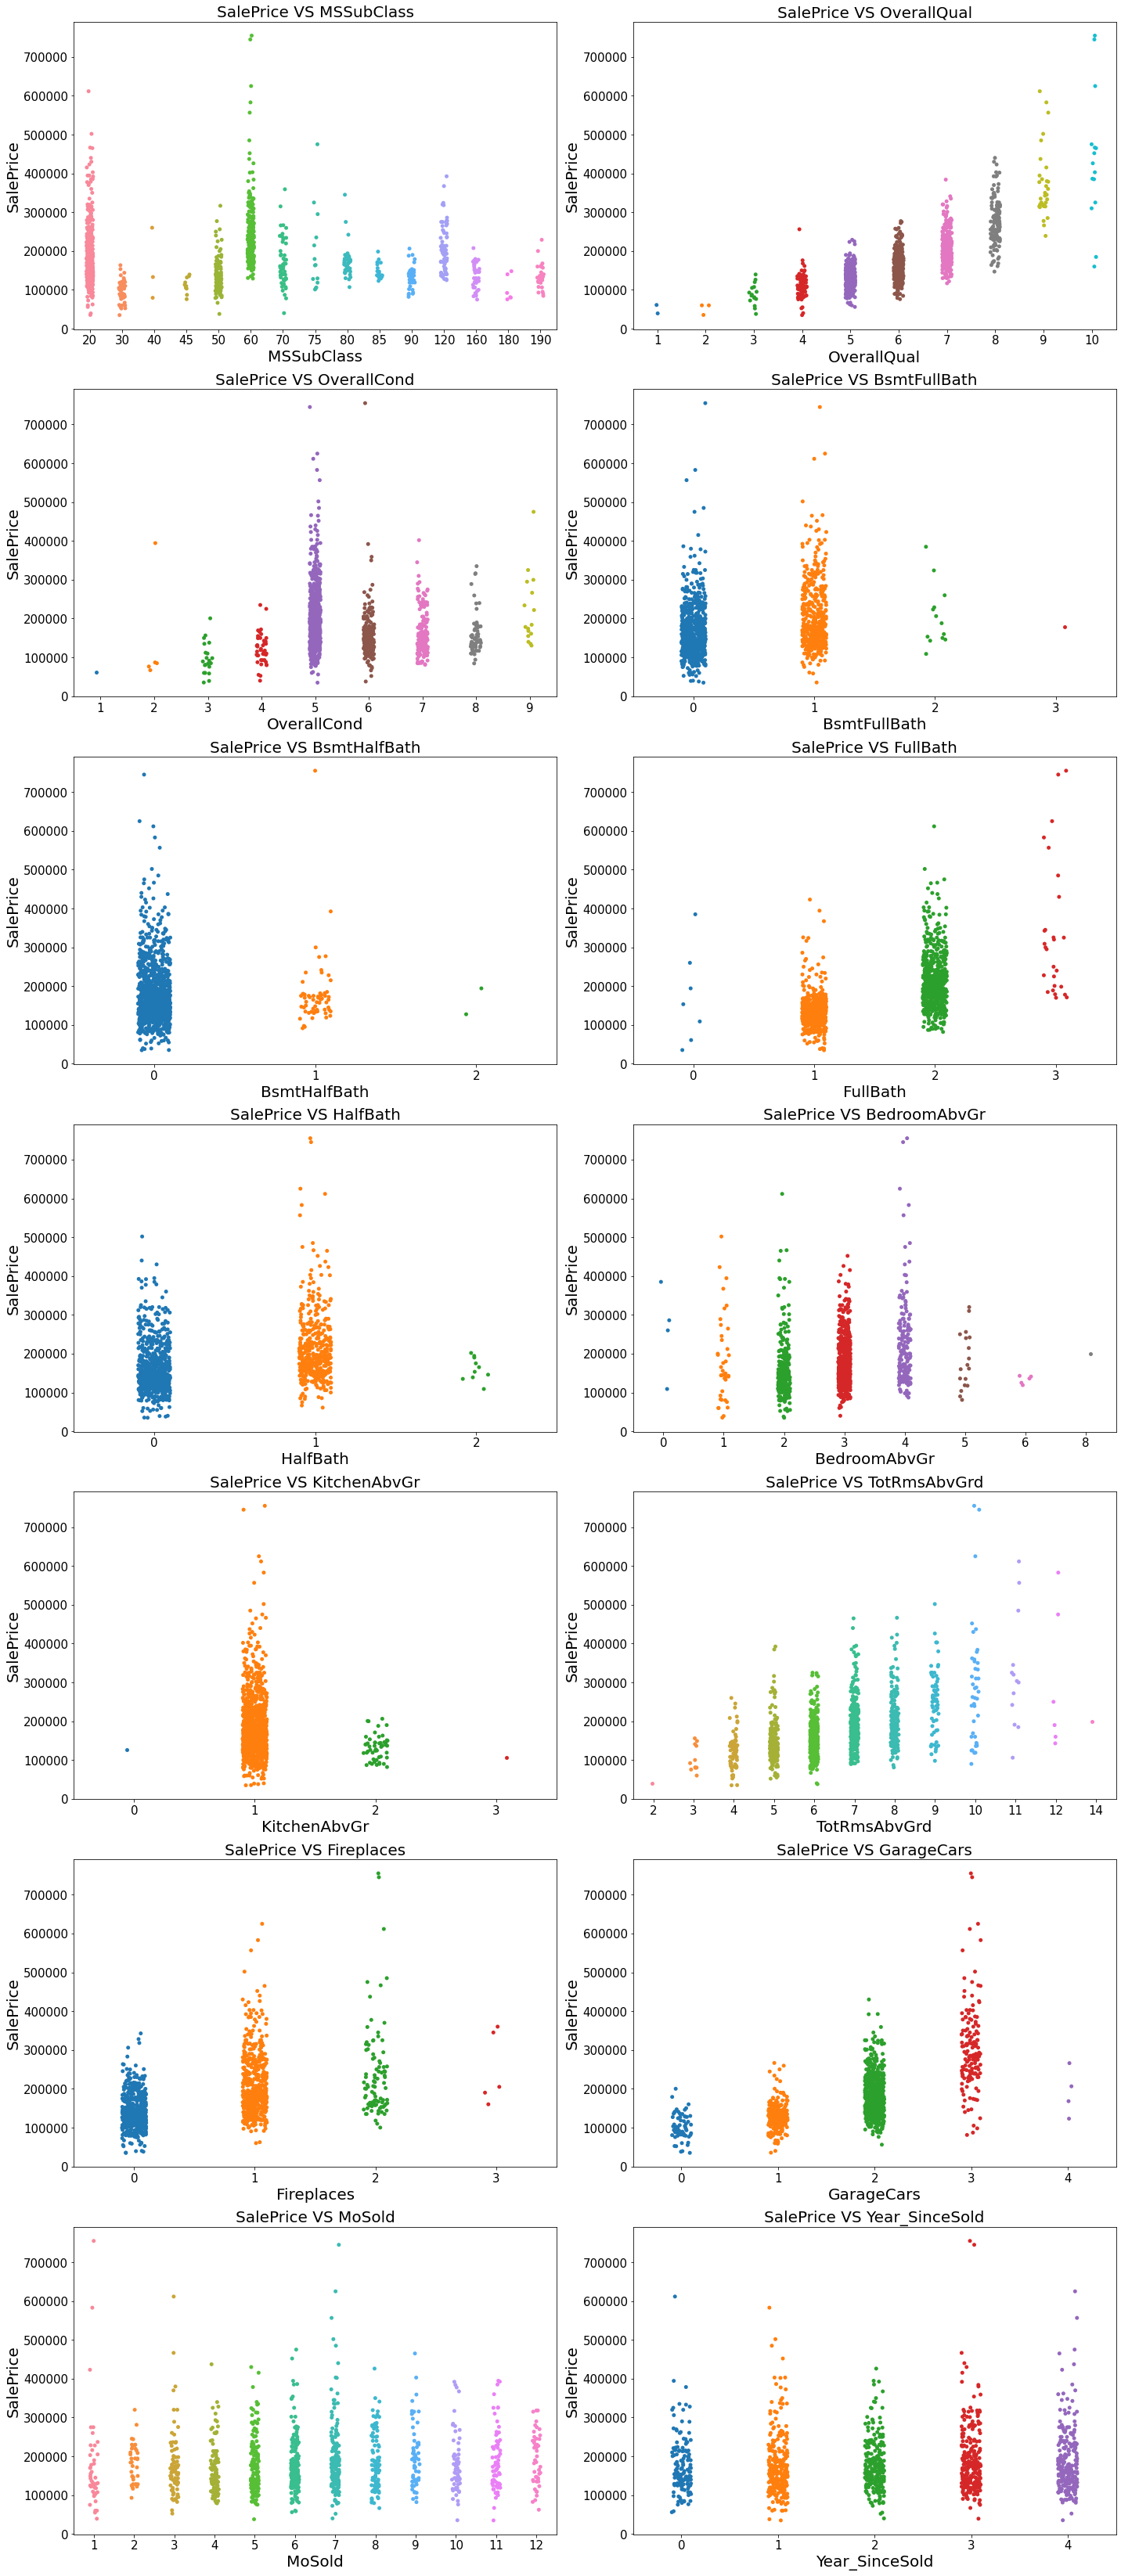

In [56]:
#stripplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col1)):
    plt.subplot(20,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['SalePrice'])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

# Observations:

- For 1-STORY 1946 & NEWER ALL STYLES(20) and 2-STORY 1946 & NEWER(60) types of dwelling(MSSuubClass) the sales is good and SalePrice is also high.
- As Rates the overall material and finish of the house(OverallQual) is increasing linearly sales is also increasing And SalePrice is also increasing linearly.
- For 5(Average) overall condition of the house(OverallCond) the sales is high and SalePrice is also high.
- For 0 and 1 Basement full bathrooms(BsmtFullBath) the sales as well as SalePrice is high.
- For 0 Basement half bathrooms(BsmtHalfBath) the sales as well as SalePrice is high.
- For 1 and 2 Full bathrooms above grade(FullBath) the sales as well as SalePrice is high.
- For 0 and 1 Half baths above grade(HalfBath) the sales as well as SalePrice is high.
- For 2, 3 and 4 Bedrooms above grade (does NOT include basement bedrooms)(BedroomAbvGr) the sales as well as SalePrice is high.
- For 1 Kitchens above grade(KitchenAbvGr) the sales as well as SalePrice is high.
- For 4-9 Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd) the sales as well as SalePrice is high.
- For 0 and 1 Number of fireplaces(Fireplaces) the sales as well as SalePrice is high.
- For 1 and 2 Size of garage in car capacity(GarageCars) the sales is high and for 3 Size of garage in car capacity(GarageCars) the SalePrice is high.
- In between april to august for Month Sold(MoSold) the sales is good with SalePrice.
- For all the Year_SinceSold the salePrice and sales both are same.

### Bivariate Analysis for Categorical Columns:

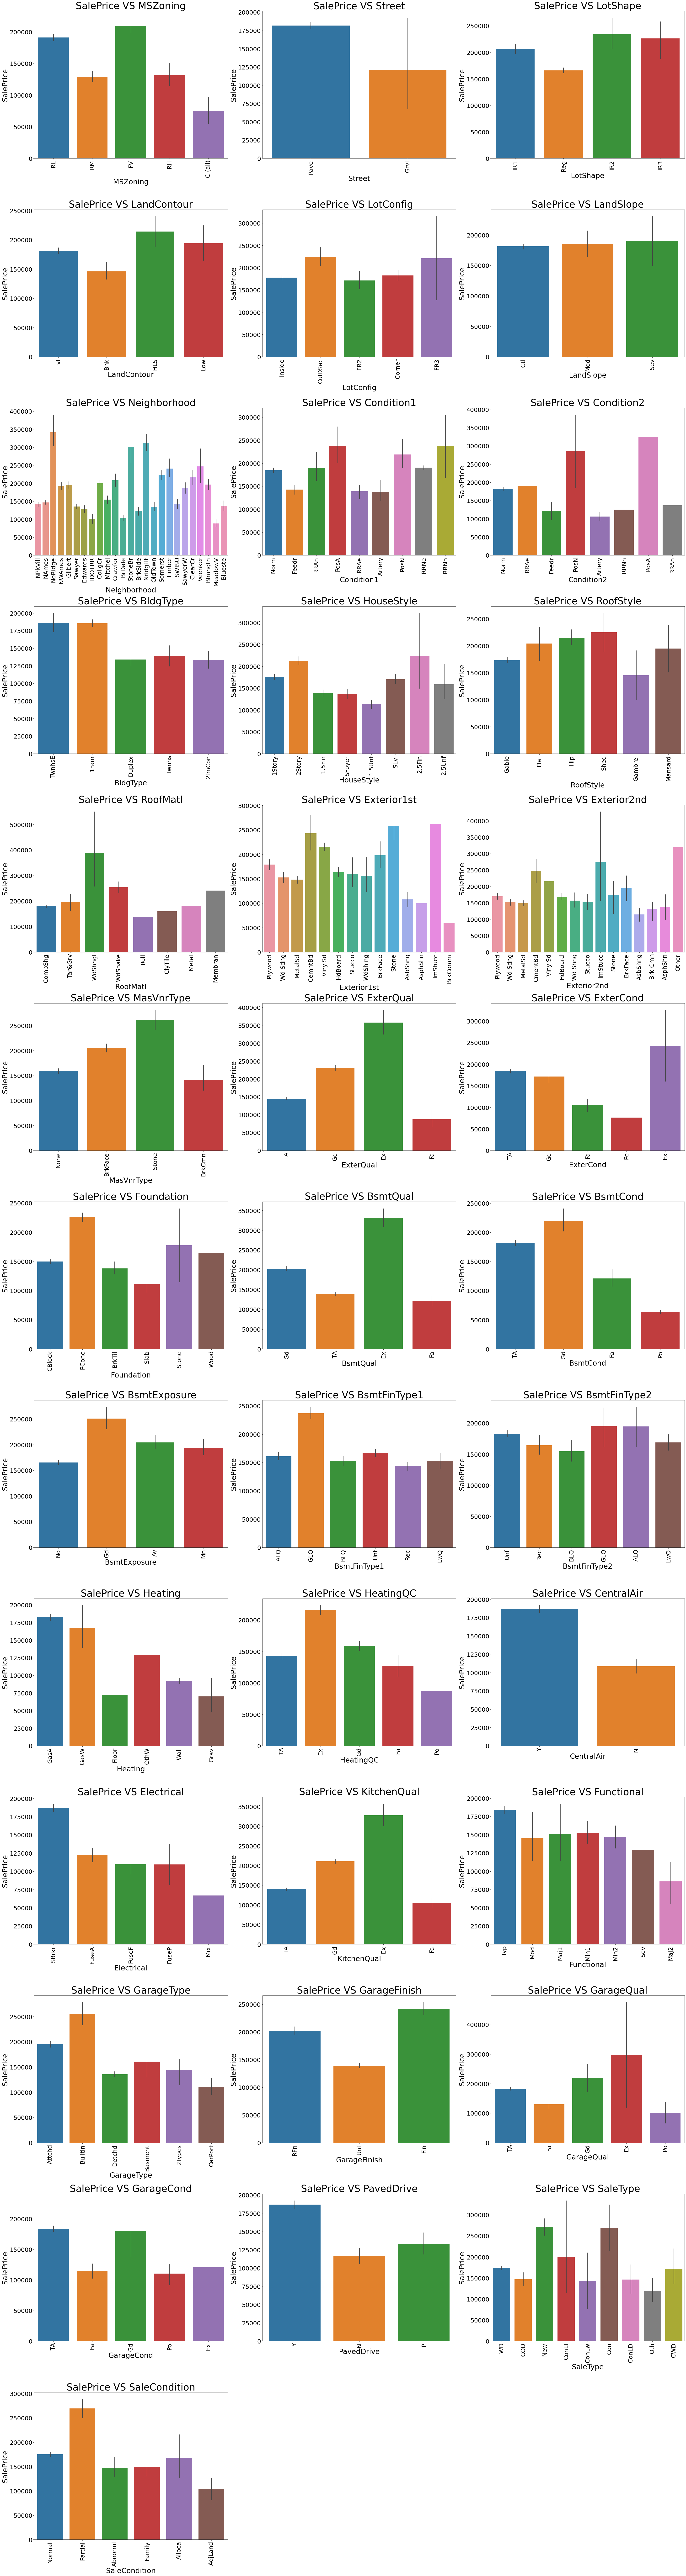

In [57]:
#Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(categorical_columns)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=df['SalePrice'],x=df[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

# Observations:

- For Floating Village Residential(FV) and Residential Low Density(RL) zoning classification of the sale(MSZoning) the saleprice is high.
- For paved type of road access to property(Street) the SalePrice is high.
- For Slightly irregular(IR1), Moderately Irregular(IR2) and Irregular(IR3) shape of property(LotShape) the SalePrice is high.
- For Hillside - Significant slope from side to side(HLS) Flatness of the property(LandContour) the SalePrice is High.
- For Cul-de-sac(CulDSac) Lot configuration(LotConfig) the SalePrice is High.
- For all types of Slope of property(LandSlope) i.e.,Gentle slope(Gtl), Moderate Slope(Mod) and Severe Slope(Sev) the SalePrice is High.
- For Northridge(NoRidge) locations within Ames city limits(Neighborhood) the SalePrice is High.
- For Within 200' of North-South Railroad(RRNn), Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions(Condition1) has the maximum SalePrice.
- For Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions (if more than one is present)(Condition2) has maximum SalePrice.
- For Single-family Detached(1Fam) and Townhouse End Unit(TwnhsE) type of dwelling(BldgType) the SalePrice is high.
- For 2Story and Two and one-half story: 2nd level finished(2.5Fin) Style of dwelling(HouseStyle) the SalePrice is high.
- For Shed Type of roof(RoofStyle) the SalePrice is high.
- For Wood Shingles(WdShngl) Roof material(RoofMat1) the SalePrice is high.
- For Cement Board(CemntBd), Imitation Stucco(ImStucc) and Stone type of Exterior covering on house(Exterior1st) the SalePrice is high.
- For Cement Board(CemntBd), Imitation Stucco(ImStucc) and other Exterior covering on house (if more than one material)(Exterior2) has maximum SalePrice.
- For Stone Masonry veneer type(MasvnrType) the SalePrice is high.
- For Excellent(Ex) quality of the material on the exterior(ExterQual) the SalePrice is high.
- For Excellent(Ex) present condition of the material on the exterior(ExterCond) the SalePrice is high.
- For Poured Contrete(PConc) Type of foundation(Foundation) the SalePrice is high.
- For Excellent(100+ inches)(Ex) height of the basement(BsmtQual) the SalePrice is high.
- For Good(Gd) general condition of the basement(BsmtCond) the SalePrice is high.
- For Good Exposure(Gd) of walkout or garden level walls(BsmtExposure) has maximum SalePrice.
- For Good Living Quarters(GLQ) of basement finished area(BsmtFinType1) has maximum SalePrice.
- For Good Living Quarters(GLQ) and Average Living Quarters(ALQ) of basement finished area (if multiple types)(BsmtFinType2) has maximum SalePrice.
- For Gas forced warm air furnace(GasA) and Gas hot water or steam heat(GasW) Type of heating(Heating) has high SalePrice.
- For Excellent(Ex) Heating quality and condition(HeatingQC) the SalePriceis high.
- For building having Central air conditioning(CentralAir) the SalePrice is high.
- For Standard Circuit Breakers & Romex(Sbrkr) of Electrical system(Electrical) the SalePrice is Maximum.
- For Excellent(Ex) Kitchen quality(KitchenQual) the SalePrice is high.
- For Typical Functionality(Typ) type of Home functionality (Assume typical unless deductions are warranted)(Functional) the SalePrice is high.
- For Excellent - Exceptional Masonry Fireplace(Ex) of Fireplace quality(FireplaceQual) has highest SalePrice.
- For Built-In (Garage part of house - typically has room above garage)(BuiltIn) Garage location(GarageType) the SalePrice is maximum.
- For Completely finished(Fin) Interior of the garage(GarageFinish) the SalePrice is high.
- For Excellent(Ex) Garage quality(GarageQual) the SalePrice is high.
- For Typical/Average(TA) and Good(Gd) Garage condition(GarageCond) the SalePrice is high.
- For having Paved driveway(PavedDrive) the SalePriceis high.
- For Home just constructed and sold(New) and Contract 15% Down payment regular terms(Con) of type of sale(SaleType) has highest SalePrice.
- For Home was not completed when last assessed (associated with New Homes)(Partial) Condition of sale(SalesCondition) the SalePrice is maximum.

# Checking for outliers:

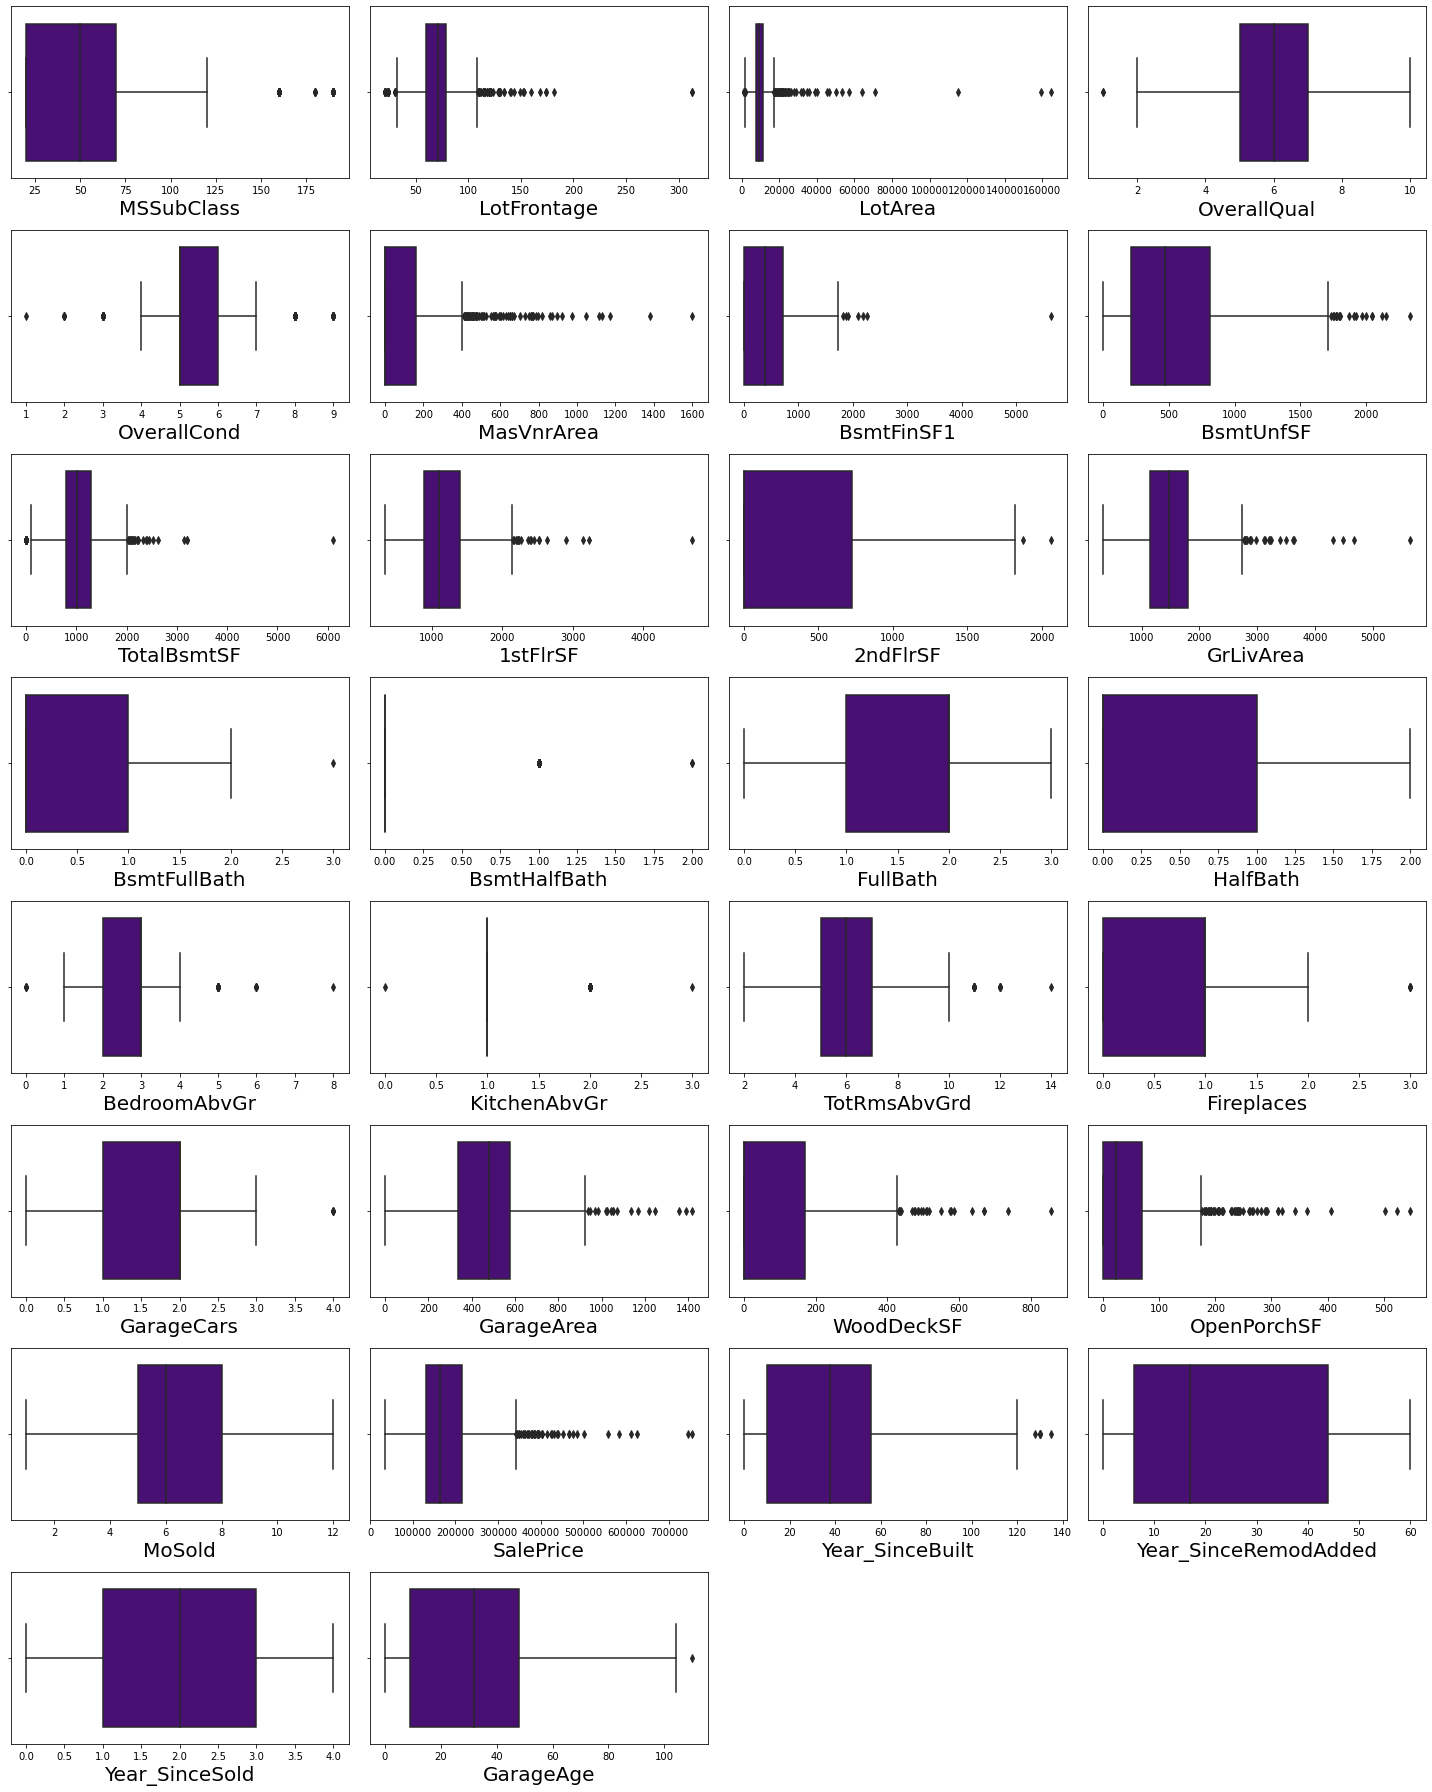

In [58]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='indigo')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observations 
The dataset has outliers present in the following columns -
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt
- GarageAge
- SalePrice

Since SalePrice is the target we need not remove outliers from this column.And some of the columns like MSSubClass, OverallQual and OverallCond are categorical so we need not remove outliers in those categorical columns.

# Removing Outliers in train dataset:

## i) Zscore method:

In [59]:
#Features having outliers in train dataset
features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']]

Listed out all the columns with outliers in train dataset.

In [60]:
# removing the outliers using score method
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]

z

array([[0.        , 0.62061571, 0.56223842, ..., 2.38785016, 0.16823612,
        0.04935633],
       [1.07063136, 0.60090318, 0.56223842, ..., 2.41799216, 0.03088544,
        0.33875365],
       [0.93686671, 0.06307504, 0.56223842, ..., 1.25752521, 0.83197465,
        0.77749319],
       ...,
       [2.09513215, 0.91636244, 0.56223842, ..., 0.70170469, 0.16823612,
        0.0906988 ],
       [0.93583847, 0.22167034, 0.56223842, ..., 0.11212927, 1.69023175,
        2.40587744],
       [0.        , 0.29303823, 0.56223842, ..., 0.42862025, 1.0310962 ,
        0.98420557]])

In [61]:
#Viewing the top 5 rows in the new dataset after removing the outliers
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
5    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
5            7            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       480.0        TA        TA     CBlock       Gd       TA   
5       None         0.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          ALQ         120          Unf        958         1078   
1           Gd          ALQ         351          Rec       1043         2217   
2           Av          GLQ         862          Unf        255         1117   
3           No          BLQ         705          Unf       1139         1844   
5           Av          Unf           0          Unf        879          879   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       958         0        958   
1    GasA        Ex          Y      SBrkr      2217         0       2217   
2    GasA        Ex          Y      SBrkr      1127       886       2013   
3    GasA        Ex          Y      SBrkr      1844         0       1844   
5    GasA        Ex          Y      SBrkr       879       984       1863   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
5             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
0          TA             5        Typ           1     Attchd          RFn   
1          Gd             8        Typ           1     Attchd          Unf   
2          TA             8        Typ           1     Attchd          Unf   
3          TA             7        Typ           1     Attchd          RFn   
5          Gd             9        Typ           1    BuiltIn          Fin   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           2         440         TA         TA          Y           0   
1           2         621         TA         TA          Y          81   
2           2         455         TA     

In [62]:
#Checking shape of new train dataset
df_new.shape

(953, 67)

In [63]:
#Checking shape of old train dataset
df.shape

(1168, 67)

The new train dataset has 953 rows and 67 columns where as the dataset previously had 1168 rows and 68 columns.

In [64]:
#Checking dataloss in zscore method of train dataset
Dataloss = (((1168-953)/1168)*100)
Dataloss

18.40753424657534

Using Z-score method for trian dataset the data loss is more than 10% so let us have a look into IQR method to remove outliers.

## ii) IQR method:

In [65]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of train dataset using IQR method.

In [66]:
#Checking shape of new train dataset
df_1.shape

(780, 67)

In [67]:
#Checking shape of old train dataset
df.shape

(1168, 67)

The new train dataset has 780 rows and 67 columns where as the dataset previously had 1168 rows and 68 columns.

In [68]:
#Checking dataloss in IQR method of train dataset
Dataloss = (((1168-780)/1168)*100)
Dataloss

33.21917808219178

In IQR method of train dataset the data loss is more than 10% so let us have a look into percentile method to remove outliers.

## iii) Percentile Method:

In [69]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

We have successfully removed outliers in train dataset using percentile method.

# Checking for outliers:

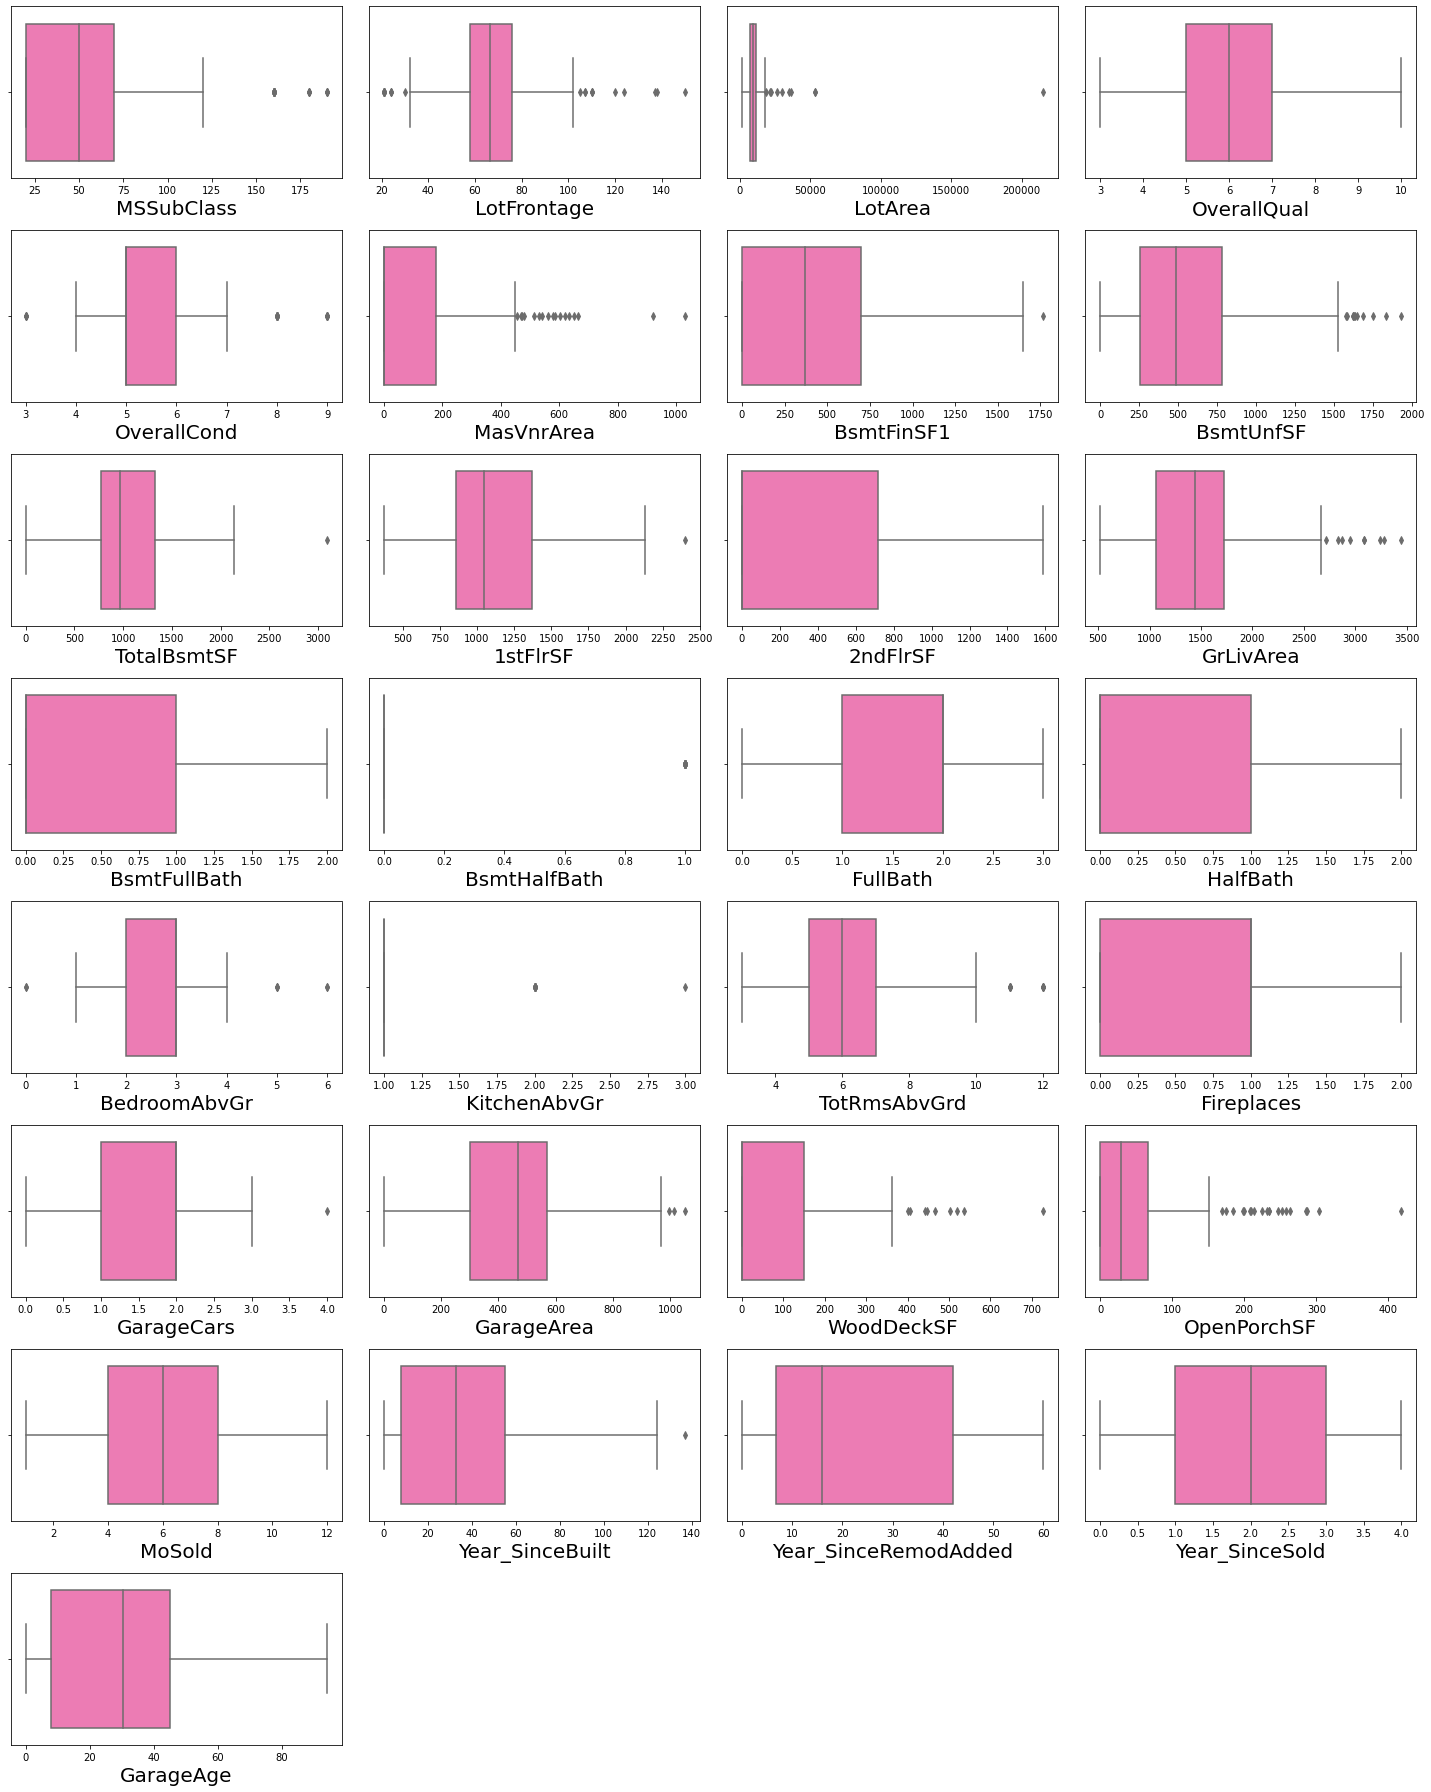

In [70]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='hotpink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observations
The test dataset also has the outliers in the columns similar to train dataset. So lets remove the outliers present in the numerical columns and proceed with further steps

# Removing Outliers in test dataset:

## i) Zscore method:

In [71]:
#Features having outliers in test dataset
features1=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]

Listed out all the columns with outliers in train dataset.

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(features1))
dff_new=dff[(z<3).all(axis=1)]

z

array([[0.98160499, 0.2638941 , 0.52071548, ..., 0.75275532, 0.05989661,
        1.06542974],
       [0.        , 0.36303034, 0.62587908, ..., 0.19226949, 0.71573848,
        0.37452289],
       [0.        , 0.08963571, 0.62587908, ..., 0.9499779 , 1.58074974,
        0.93382843],
       ...,
       [0.        , 0.04477488, 0.40605602, ..., 0.70997874, 0.71573848,
        0.08608167],
       [0.8236549 , 0.42419737, 0.62587908, ..., 0.70997874, 0.35073373,
        0.84278917],
       [2.27789203, 0.65316043, 1.71317382, ..., 0.11831103, 0.71573848,
        0.0126193 ]])

In [73]:
#Displaying the top 5 columns of the dataset after removing the outliers using the zcore method
dff_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            9            5       Hip  CompShg     VinylSd     VinylSd   
1            8            5     Gable  CompShg     HdBoard     HdBoard   
2            8            5       Hip  CompShg     VinylSd     VinylSd   
3            7            7     Gable  CompShg     MetalSd     MetalSd   
4            6            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0      Stone       200.0        Gd        TA      PConc       Ex       TA   
1       None         0.0        Gd        TA     CBlock       Gd       TA   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     CBlock       TA       TA   
4      Stone        74.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           Gd          GLQ        1249          Unf        673         1922   
1           Av          GLQ        1036          Unf        184         1220   
2           Av          Unf           0          Unf       1753         1753   
3           No          Rec         275          Unf        429          704   
4           Mn          Unf           0          Unf        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr      1922         0       1922   
1    GasA        Gd          Y      SBrkr      1360         0       1360   
2    GasA        Ex          Y      SBrkr      1788         0       1788   
3    GasA        Ex          Y      SBrkr       860       704       1564   
4    GasA        Ex          Y      SBrkr       894      1039       1933   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
0          Gd             8        Typ           1     Attchd          Fin   
1          Gd             4        Typ           1     Attchd          RFn   
2          Ex             7        Typ           1     Attchd          RFn   
3          Fa             7        Typ           1     Attchd          Unf   
4          Gd             9        Typ           1    BuiltIn          Fin   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           3         676         TA         TA          Y         178   
1           2         565         TA         TA          Y          63   
2           2         522         TA     

In [74]:
#Checking shape of new test dataset
dff_new.shape

(235, 66)

In [75]:
#Checking shape of old test dataset
dff.shape

(292, 66)

The test dataset had 292 rows and 66 columns and now has 235 rows and 66 columns

In [76]:
#Checking dataloss in zscore method of test dataset
Dataloss1 = (((292-235)/292)*100)
Dataloss1

19.52054794520548

Using Z-score method for train dataset the data loss is more than 10% so let us have a look into IQR method to remove outliers.

## ii) IQR method:

In [77]:
# 1st quantile
Q1=features1.quantile(0.25)

# 3rd quantile
Q3=features1.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [78]:
#Checking shape of new test dataset
dff_1.shape

(185, 66)

In [79]:
#Checking shape of old test dataset
dff.shape

(292, 66)

The test dataset had 292 rows and 66 columns and now has 185 rows and 66 columns

In [80]:
#Checking dataloss in IQR method of test dataset
Dataloss1 = (((292-185)/292)*100)
Dataloss1

36.64383561643836

Using IQR method for test dataset the data loss is more than 10% so let us have a look into percentile method to remove outliers.

## iii) Percentile Method:

In [81]:
#Removing outliers using percentile method in test dataset
for col1 in features1:
    if dff[col1].dtypes != 'object':
        percentile = dff[col1].quantile([0.01,0.98]).values
        dff[col][dff[col]<=percentile[0]]=percentile[0]
        dff[col][dff[col]>=percentile[1]]=percentile[1]

We have successfully removed outliers in test dataset using percentile method.

## Checking for skewness:

In [82]:
#Checking for skewness of train dataset
df.skew()

MSSubClass              1.422019
LotFrontage             0.188060
LotArea                 1.191912
OverallQual             0.175082
OverallCond             0.580714
MasVnrArea              1.873138
BsmtFinSF1              0.639523
BsmtUnfSF               0.777624
TotalBsmtSF             0.166773
1stFlrSF                0.645842
2ndFlrSF                0.717390
GrLivArea               0.592755
BsmtFullBath            0.355224
BsmtHalfBath            3.954345
FullBath                0.057809
HalfBath                0.656492
BedroomAbvGr           -0.145762
KitchenAbvGr            4.374289
TotRmsAbvGrd            0.443931
Fireplaces              0.552677
GarageCars             -0.434745
GarageArea             -0.135675
WoodDeckSF              1.053617
OpenPorchSF             1.513678
MoSold                  0.220979
SalePrice               1.953878
Year_SinceBuilt         0.468682
Year_SinceRemodAdded    0.495864
Year_SinceSold         -0.115765
GarageAge               0.608757
dtype: flo

# Observations
We can observe that the following columns have skewness present in train dataset
- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- SalePrice
- GarageAge


SalePrice is the target we need not remove skewness in this column.And MSSubClass and OverallCond are seems to be categorical so let us ignore these columns.

In [83]:
#Checking for skewness of test dataset
dff.skew()

MSSubClass               1.358597
LotFrontage              0.466813
LotArea                 12.781805
OverallQual              0.397312
OverallCond              1.209714
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtUnfSF                0.960708
TotalBsmtSF              0.519257
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
GrLivArea                1.010586
BsmtFullBath             0.463685
BsmtHalfBath             3.544994
FullBath                -0.049800
HalfBath                 0.758892
BedroomAbvGr             0.075315
KitchenAbvGr             4.849432
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
GarageCars              -0.280324
GarageArea               0.133547
WoodDeckSF               1.708221
OpenPorchSF              2.185030
MoSold                   0.186504
Year_SinceBuilt          0.755233
Year_SinceRemodAdded     0.535600
Year_SinceSold          -0.018412
GarageAge                0.000000
dtype: float64

# Observations
We can observe that the following columns have skewness present in test dataset
- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt
- Year_SinceRemodAdded


MSSubClass and OverallCond are seems to be categorical so let us ignore these columns.


In GarageAge skewness is zero which means all the entries in this column are same so we can drop it from the test dataset. Since are dropping in test dataset we shall drop the same from the train dataset too

In [84]:
#Dropping unnecessary column in train dataset
df = df.drop(["GarageAge"],axis=1)

In [85]:
#Dropping unnecessary column in test dataset
dff = dff.drop(["GarageAge"],axis=1)

## Removing skewness using yeo-johnson method for train dataset:

In [86]:
#Creating a list of skewed features in train dataset
fea=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

Taking a list as fea with all the columns with skewness in train dataset.

In [87]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method we have removed the skewness in train dataset.

In [88]:
df[fea] = scaler.fit_transform(df[fea].values)

In [89]:
#Checking skewness again in train dataset
df[fea].skew()

LotArea         0.077861
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
dtype: float64

After removing skewness we have high skewness in BsmtHalfBath .let us drop this column from the train dataset

In [90]:
#Dropping unnecessary column
df = df.drop(["BsmtHalfBath"],axis=1)

In [91]:
#Creating a list of skewed features in test dataset
fea1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded']

Listing all the columns with skewness in test dataset as fea1.

In [92]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [93]:
dff[fea1] = scaler.fit_transform(dff[fea1].values)

Using yeo_johnson method we have removed the skewness in test dataset.

In [94]:
#Checking skewness again in test dataset
dff[fea1].skew()

LotArea                 0.003111
MasVnrArea              0.363253
BsmtFinSF1             -0.441605
BsmtUnfSF              -0.232099
1stFlrSF               -0.000548
2ndFlrSF                0.284246
GrLivArea              -0.000307
BsmtHalfBath            3.544994
HalfBath                0.621093
KitchenAbvGr            0.000000
TotRmsAbvGrd           -0.000469
Fireplaces              0.076669
WoodDeckSF              0.210102
OpenPorchSF            -0.058951
Year_SinceBuilt        -0.147007
Year_SinceRemodAdded   -0.081089
dtype: float64

After removing skewness we have high skewness in BsmtHalfBath .Since we have removed this column in train dataset to get same allingment let me drop in test also.

In [95]:
#Dropping unnecessary column
dff = dff.drop(["BsmtHalfBath"],axis=1)

# Ordinal Encoding:

In [96]:
#Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [97]:
#Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
for i in column:
    dff[i] = dff[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

We have replaced all rating entries with required numbers.

In [98]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [99]:
#Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dff.columns:
    if dff[i].dtypes=='object':
        dff[i]=OE.fit_transform(dff[i].values.reshape(-1,1))

We have  encoded all my categorical columns in train and test datasets using Ordinal encoder.

# Checking correlation using heat map:

In [100]:
#Correlation of train dataset
cor=df.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.391424 -0.400825 -0.035981   
MSZoning                0.007478  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage            -0.391424 -0.084834     1.000000  0.596143 -0.044573   
LotArea                -0.400825 -0.058912     0.596143  1.000000 -0.072669   
Street                 -0.035981  0.140215    -0.044573 -0.072669  1.000000   
...                          ...       ...          ...       ...       ...   
SaleCondition          -0.028981  0.004501     0.076587  0.046115  0.014176   
SalePrice              -0.060775 -0.133221     0.358470  0.394343  0.044753   
Year_SinceBuilt        -0.031787  0.296752    -0.130022 -0.028547 -0.021386   
Year_SinceRemodAdded   -0.056618  0.174586    -0.080871 -0.028632 -0.057866   
Year_SinceSold          0.038595  0.004964     0.005074  0.039843  0.019635   

                      LotShape  LandContour  LotConfig  LandSlope  \
MSSubClass            0.104485    -0.021387   0.076880  -0.014930   
MSZoning              0.053655     0.001175  -0.027246  -0.023952   
LotFrontage          -0.157341    -0.016620  -0.201691   0.023253   
LotArea              -0.287003    -0.074834  -0.198998   0.176280   
Street               -0.012941     0.105226   0.000153  -0.141572   
...                        ...          ...        ...        ...   
SaleCondition        -0.054905     0.047715   0.043692  -0.061461   
SalePrice            -0.248171     0.032836  -0.060452   0.015485   
Year_SinceBuilt       0.231550    -0.158435  -0.009537   0.088287   
Year_SinceRemodAdded  0.155428    -0.086936   0.009281   0.048599   
Year_SinceSold       -0.021421    -0.009499   0.009817   0.005352   

                      Neighborhood  Condition1  Condition2  BldgType  \
MSSubClass                0.013918   -0.042474   -0.044319  0.731815   
MSZoning                 -0.251833   -0.025651    0.031959 -0.024776   
LotFrontage               0.091671   -0.022579    0.011970 -0.467073   
LotArea                   0.075420    0.069366    0.056741 -0.524128   
Street                    0.001420    0.002189    0.001406 -0.013606   
...                            ...         ...         ...       ...   
SaleCondition             0.042340    0.059027    0.054288 -0.000308   
SalePrice                 0.198942    0.105820    0.033956 -0.066028   
Year_SinceBuilt          -0.119171   -0.164566   -0.063531 -0.229057   
Year_SinceRemodAdded     -0.091489   -0.157356   -0.038531 -0.121432   
Year_SinceSold           -0.026181    0.004127    0.029983  0.011168   

                      HouseStyle  OverallQual  OverallCond  RoofStyle  \
MSSubClass              0.381585     0.070462    -0.056978  -0.100641   
MSZoning               -0.110991    -0.134037     0.189553   0.000913   
LotFrontage             0.057902     0.230687    -0.051887   0.168101   
LotArea                 0.005503     0.190547     0.010314   0.119446   
Street                  0.016793     0.057140     0.031082  -0.006875   
...                          ...          ...          ...        ...   
SaleCondition           0.024668     0.212932     0.023908   0.064453   
SalePrice               0.205502     0.789185    -0.065642   0.192654   
Year_SinceBuilt        -0.276730    -0.589595     0.375101  -0.034724   
Year_SinceRemodAdded   -0.223703    -0.555945    -0.080669  -0.004728   
Year_SinceSold          0.006124     0.048759    -0.055517  -0.028443   

                      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
MSSubClass           -0.032214    -0.090178    -0.120022   -0.013252   
MSZoning              0.009719    -0.012037     0.005548   -0.033521   
LotFrontage           0.063294     0.079942     0.108934   -0.066054   
LotArea               0.220463     0.079181     0.095689   -0.019842   
Street                0.007889     0.012482     0.014618    0.000822   
...                        ...          ...          ...         ...  

Above are the correlations of all the pair of features of train dataset.To get better visualization on the correlation of features,let us plot it using heat map.

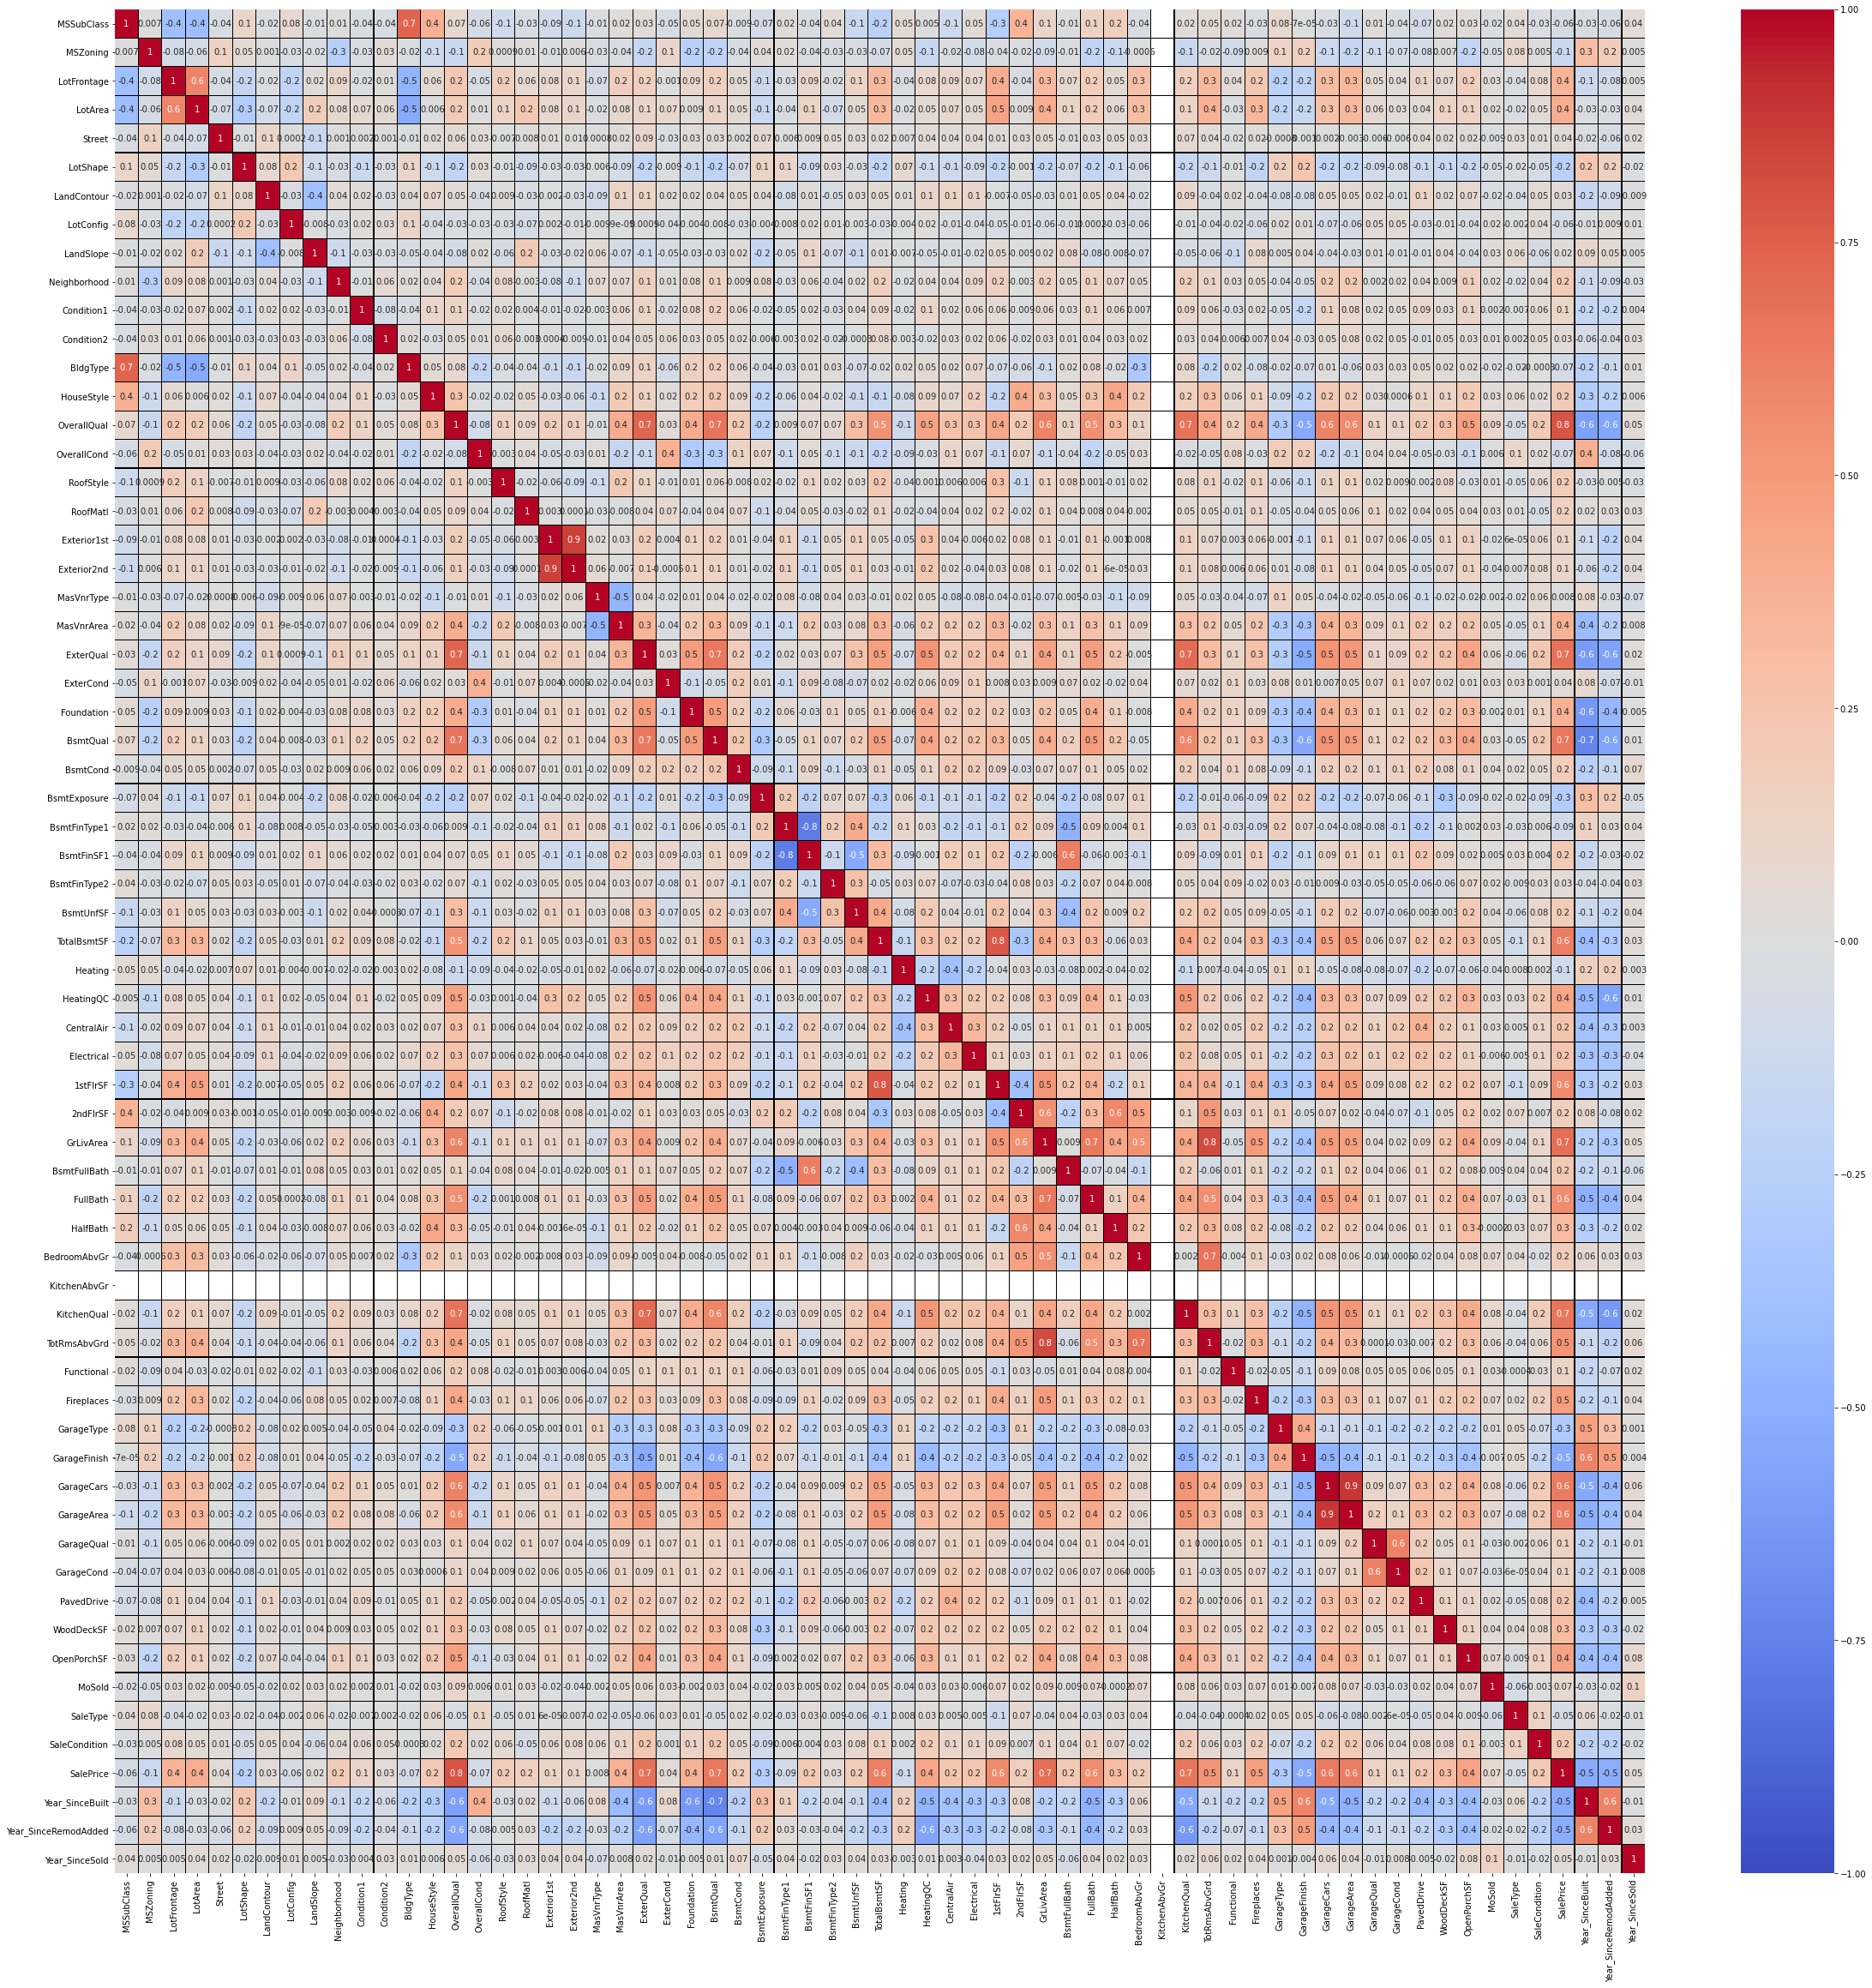

In [101]:
# Visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

We can clearly observe a multicollinearity issue in some of the features of train dataset so we have to check VIF and Let us plot a bar graph to get better insight on targets correlation with other features.

In [102]:
#Correlation of test dataset
cor=dff.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.559657  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.335805 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.623700 -0.056531   
LotArea                -0.559657 -0.335805     0.623700  1.000000 -0.099348   
Street                  0.004588 -0.063162    -0.056531 -0.099348  1.000000   
...                          ...       ...          ...       ...       ...   
SaleType               -0.105307  0.123993     0.034876  0.076505 -0.019125   
SaleCondition          -0.010155  0.005290     0.037168  0.058346 -0.012345   
Year_SinceBuilt        -0.024612  0.365869    -0.152912 -0.079597 -0.046874   
Year_SinceRemodAdded    0.060546  0.188508    -0.085350 -0.059335 -0.090380   
Year_SinceSold         -0.044441  0.072716    -0.059745 -0.017708  0.040272   

                      LotShape  LandContour  LotConfig  LandSlope  \
MSSubClass            0.176681     0.068736   0.071784  -0.073979   
MSZoning              0.167716    -0.099137   0.055261  -0.035312   
LotFrontage          -0.147720    -0.086163  -0.124470   0.176406   
LotArea              -0.294907    -0.139905  -0.150922   0.429145   
Street               -0.002444     0.153613   0.058229  -0.324146   
...                        ...          ...        ...        ...   
SaleType              0.072375     0.056451   0.104593   0.052109   
SaleCondition         0.033945    -0.027454   0.092637   0.033637   
Year_SinceBuilt       0.172947    -0.158742  -0.033157   0.050972   
Year_SinceRemodAdded  0.109506    -0.089633  -0.026791   0.122739   
Year_SinceSold       -0.097144    -0.064777  -0.008814  -0.013349   

                      Neighborhood  Condition1  Condition2  BldgType  \
MSSubClass               -0.081962    0.042599   -0.036770  0.798007   
MSZoning                 -0.204984   -0.059909    0.105995  0.230251   
LotFrontage               0.184817    0.064350   -0.018887 -0.436593   
LotArea                   0.184733    0.059812   -0.034579 -0.588876   
Street                   -0.045972   -0.246714    0.004868 -0.028820   
...                            ...         ...         ...       ...   
SaleType                 -0.113653    0.023203    0.013500 -0.152846   
SaleCondition            -0.020793    0.047082    0.008714 -0.013929   
Year_SinceBuilt          -0.101797   -0.099963    0.075582 -0.147535   
Year_SinceRemodAdded     -0.160063   -0.035093    0.082111 -0.010167   
Year_SinceSold           -0.077842    0.040503   -0.006233 -0.049329   

                      HouseStyle  OverallQual  OverallCond  RoofStyle  \
MSSubClass              0.455233    -0.116077    -0.068113  -0.183492   
MSZoning               -0.068366    -0.276394     0.191126  -0.031210   
LotFrontage            -0.080950     0.254760    -0.096571   0.199222   
LotArea                -0.082811     0.217092    -0.099886   0.234422   
Street                  0.043073     0.066173     0.077702  -0.054925   
...                          ...          ...          ...        ...   
SaleType                0.011406    -0.095468     0.067941   0.033228   
SaleCondition           0.013427     0.153589    -0.026168   0.091900   
Year_SinceBuilt        -0.234138    -0.653168     0.376525  -0.124875   
Year_SinceRemodAdded   -0.085459    -0.553280    -0.018101  -0.126694   
Year_SinceSold          0.063869    -0.061736     0.001908   0.018088   

                      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
MSSubClass           -0.019367    -0.103303    -0.202425   -0.092343   
MSZoning             -0.022604    -0.028611    -0.028994    0.010358   
LotFrontage           0.077308     0.018168     0.035881    0.055159   
LotArea               0.035262     0.070080     0.090332    0.002839   
Street                0.006540    -0.021532    -0.019729    0.036783   
...                        ...          ...          ...         ...  

Above are the correlations of all the pair of features of test dataset.To get better visualization on the correlation of features,let us plot it using heat map.

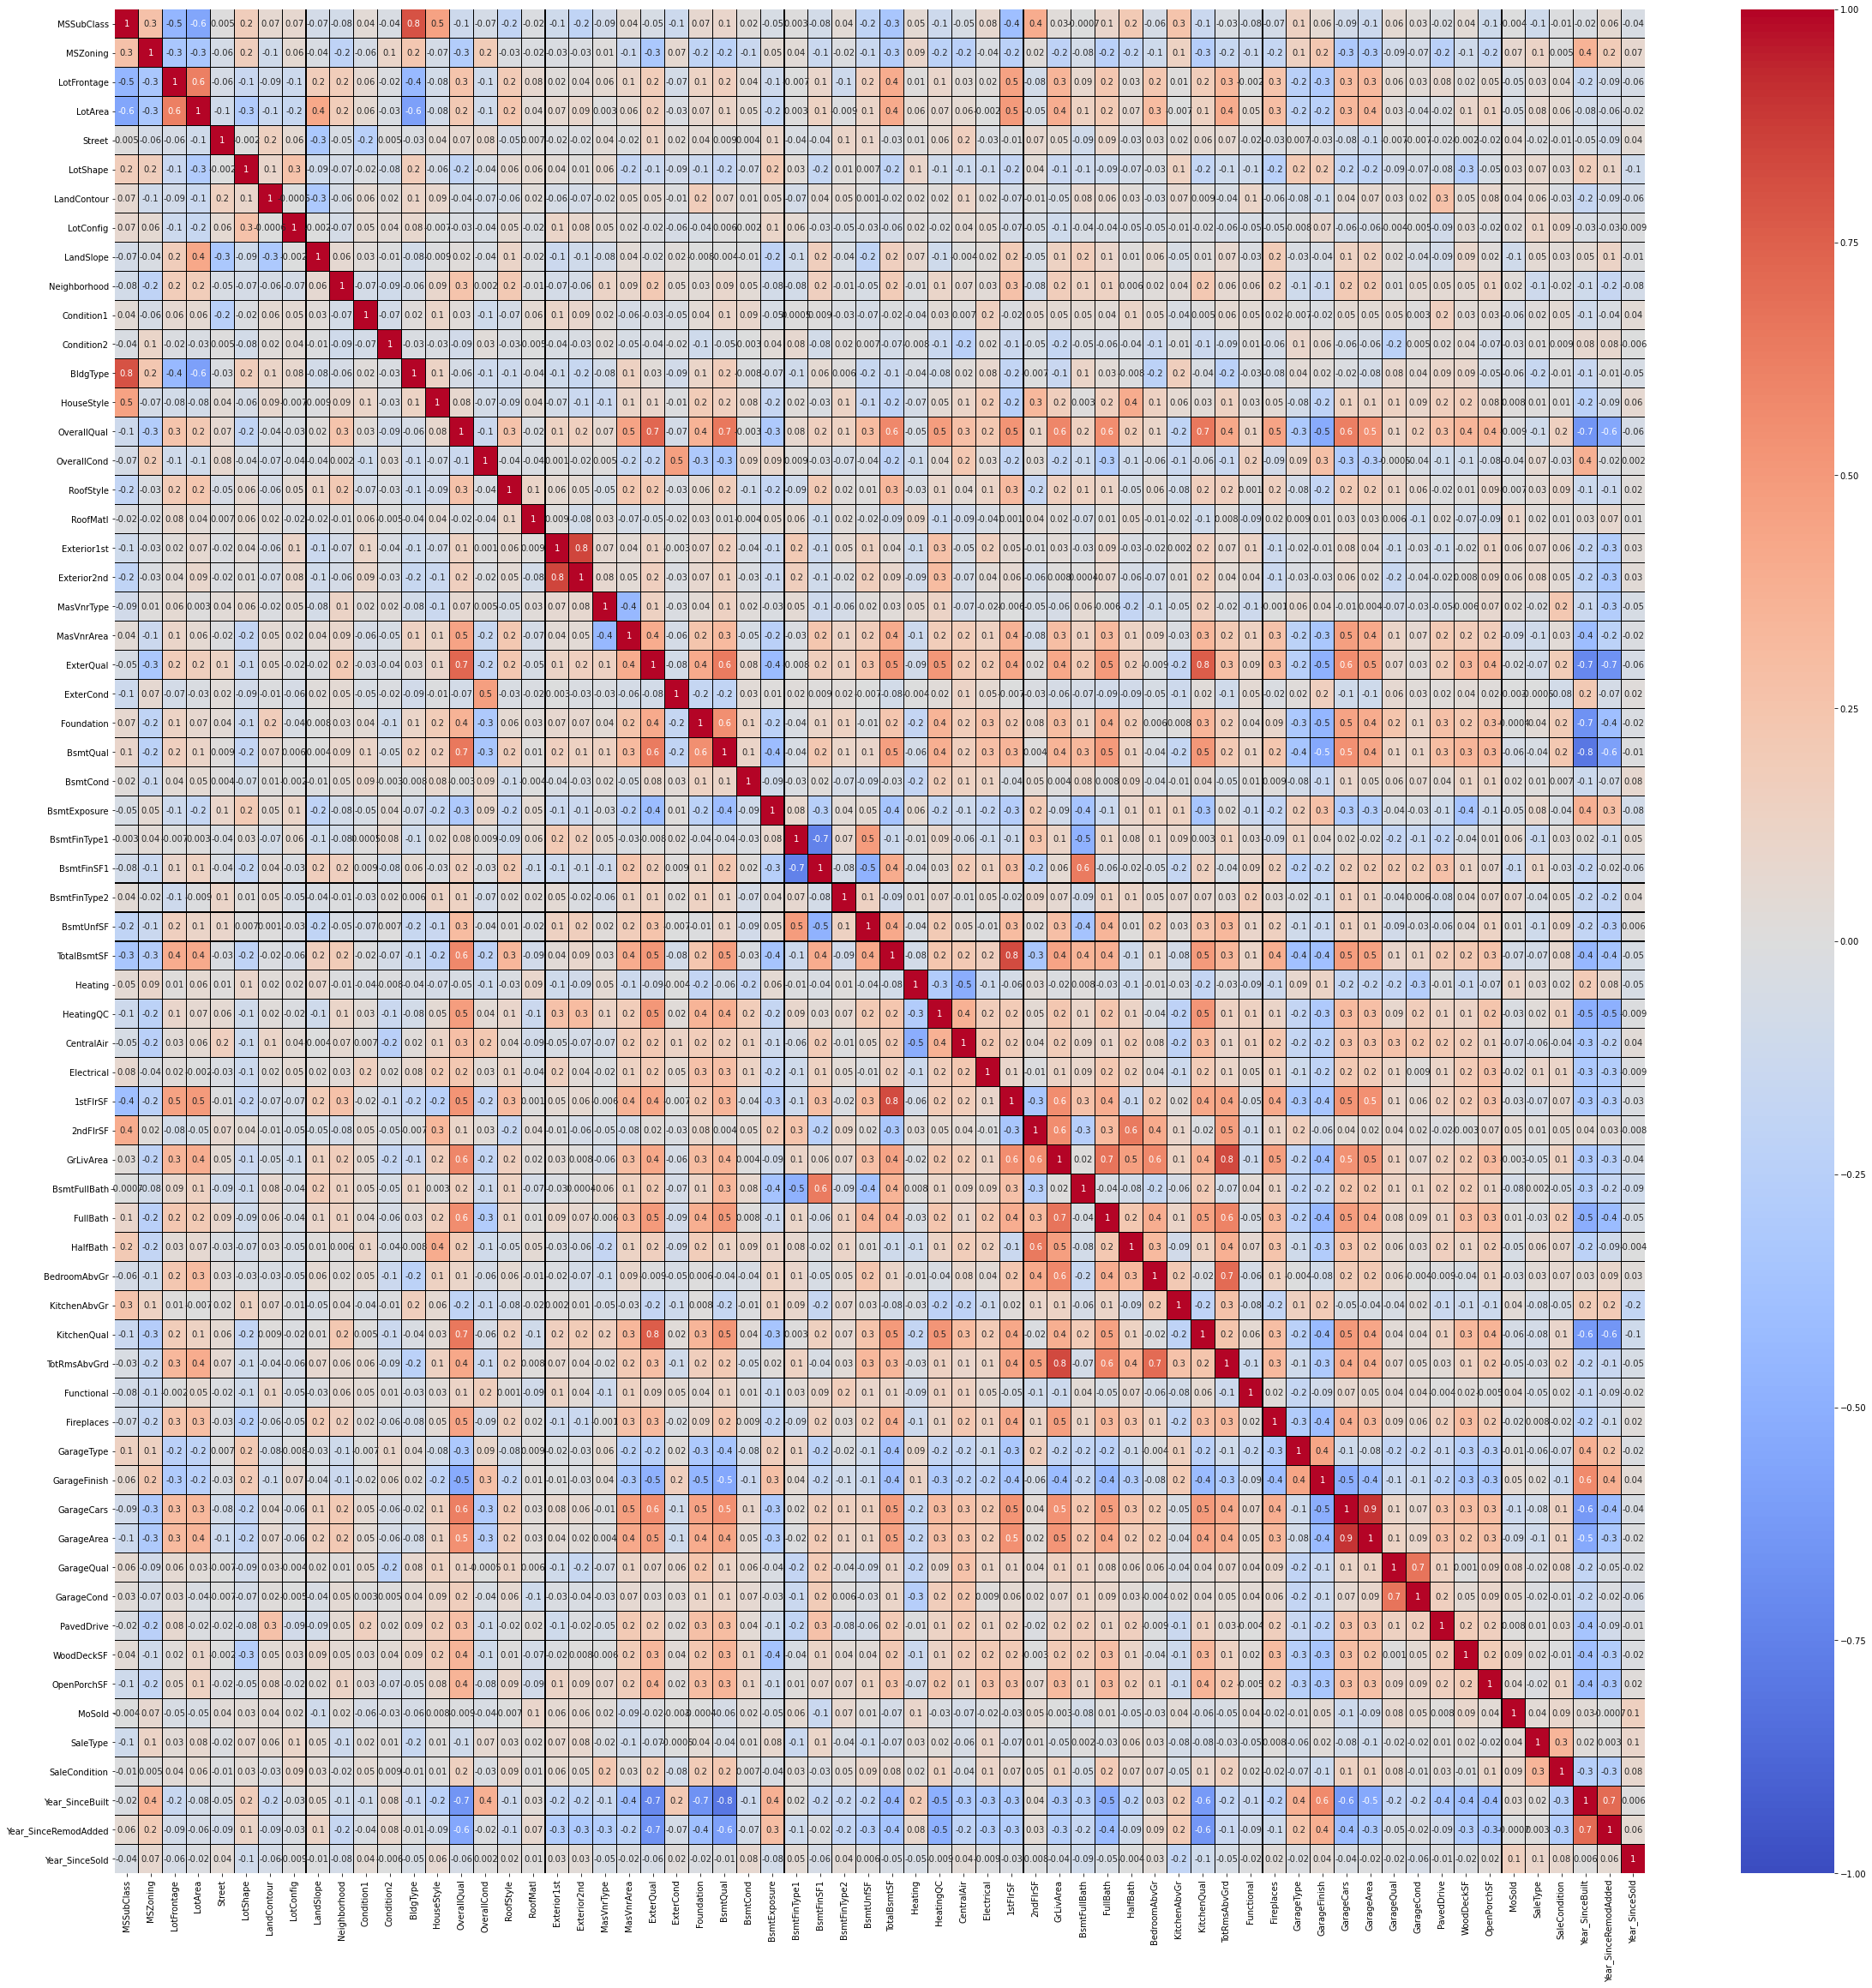

In [103]:
# Visualizing the correlation matrix by plotting heat map for test dataset.
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

We can clearly observe a multicollinearity issue in some of the features of test dataset so we have to check VIF and Let us plot a bar graph to get better insight on targets correlation with other features.

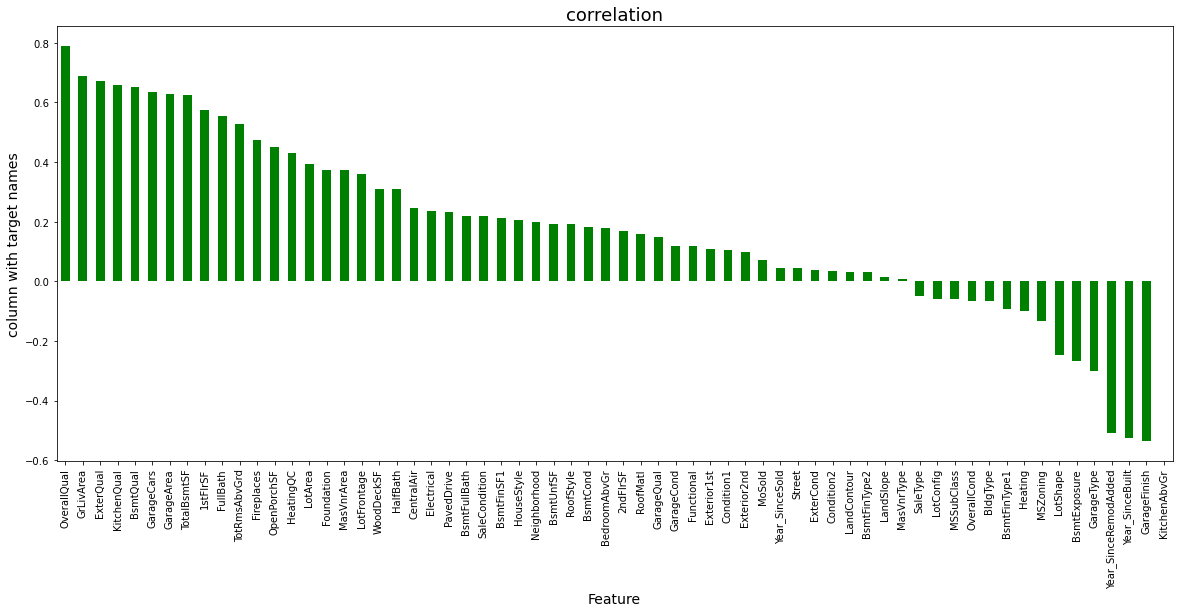

In [104]:
plt.figure(figsize=(20,8))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Observations
We can observe the correlation of the target with the other features in the train dataset
- Here most of the features have positive correlation where as few of the features are negatively correlated.

# Separating features and label in train dataset:

In [105]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

We have separated the target and independent columns.

# Scaling the train data using standard scaler:

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

We have scaled the train data using standard scaler.

In [107]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1   -0.877042 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2    0.077095 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3   -0.877042 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4   -0.877042 -0.021646     0.039092  1.497522  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.822896  -0.700004  -0.223988   
1     1.079014     1.050880    0.395209   -0.822896   1.032209   2.589114   
2    -0.535912    -0.682775    0.395209   -0.822896   1.032209  -0.223988   
3    -0.212927    -0.104890   -1.241686    1.385487  -0.700004  -0.223988   
4    -1.504868    -1.549602    2.032104    1.140684   1.032209  -0.223988   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836  0.647378 -0.037507      0.635539     -1.523529   -0.117054   
1    0.852451 -0.832343  3.332324     -1.113129     -1.523529    0.395541   
2    0.852451  0.647378 -0.037507     -1.987463     -0.434828    0.934402   
3   -0.557836  0.647378 -0.037507      0.635539     -0.979178    0.803940   
4   -0.557836  0.647378 -0.037507      0.635539     -1.523529    1.189724   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0      0.310141   0.916764     0.067300 -0.11909  -1.178317    0.267506   
1     -0.771186   1.042594     2.453434 -0.11909   0.903792    0.267506   
2      0.310141  -0.510359     0.165553 -0.11909   0.903792    0.267506   
3      0.310141   1.178365     1.997087 -0.11909   0.903792    0.267506   
4      0.310141  -0.230032     1.387415 -0.11909  -0.137262    0.267506   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0    0.299036 -0.481887 -0.871789  -1.281768     -0.838227  0.793082   
1    0.299036  2.082190 -0.871789   1.377184      1.192995  0.793082   
2    0.299036  0.048689  1.177246   1.060650      1.192995  0.793082   
3    0.299036  1.665038 -0.871789   0.775546     -0.838227  0.793082   
4    0.299036  1.201931 -0.871789   0.322952     -0.838227  0.793082   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.782707     -1.144966           0.0    -0.788838     -1.009429   
1 -0.782707      1.475072           0.0     0.716657      0.975397   
2  1.268421      0.165053           0.0    -0.788838      0.975397   
3 -0.782707      0.165053           0.0    -0.788838      0.313788   
4 -0.782707      0.165053           0.0     0.716657      0.975397   

   Functional  Fireplaces  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.261146    0.779453   -0.693653     -0.288773    0.307737   -0.163806   
1    0.261146    0.779453   -0.693653      0.946709    0.307737    0.717359   
2    0.261146    0.779453   -0.693653      0.946709    0.307737   -0.090782   
3    0.261146    0.779453   -0.693653     -0.288773    0.307737    0.352235   
4    0.261146    0.779453   -0.693653     

This is the train data of independent variables after scaling.

# Scaling the test data using standard scaler:

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

We  have scaled my test data using standard scaler.

In [109]:
X_1.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -0.856054 -0.287006     0.981605  0.842656  0.083045 -1.402669   
1    1.431981 -0.287006     0.000000 -0.739104  0.083045 -1.402669   
2   -0.856054 -0.287006     0.000000  0.524304  0.083045  0.745474   
3    0.287963 -0.287006     0.429998  0.548484  0.083045  0.745474   
4    0.059160 -0.287006     0.981605  0.897263  0.083045 -1.402669   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.566101  -2.001106  -0.226274      1.554460   -0.028763   -0.058621   
1     0.299297  -1.351136  -0.226274      1.554460   -0.028763   -0.058621   
2     0.299297   0.598774  -0.226274     -1.281387   -0.028763   -0.058621   
3    -3.998799   0.598774  -0.226274     -1.114572   -0.028763   -0.058621   
4     0.299297  -1.351136  -0.226274      1.387645   -1.228602   -0.058621   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0 -0.444642   -0.518671     2.157766    -0.464603   1.846195 -0.078757   
1  2.722077   -0.518671     1.419117    -0.464603  -0.523427 -0.078757   
2 -0.444642   -0.518671     1.419117    -0.464603   1.846195 -0.078757   
3 -0.444642    1.011146     0.680468     1.419621  -0.523427 -0.078757   
4 -0.444642    1.011146    -0.058181    -0.464603  -0.523427 -0.078757   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.694397     0.733065    1.952161    1.182923   1.137790  -0.299447   
1    -1.046066    -1.248926    0.355435   -0.846534   1.137790  -0.299447   
2     0.694397     0.733065    0.355435   -0.846534   1.137790  -0.299447   
3    -0.610950    -0.588262    0.355435   -0.846534  -0.648418  -0.299447   
4     0.694397     0.733065    1.952161    0.952580   1.137790  -0.299447   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0    0.776109  2.077301 -0.045376     -1.192678     -0.377559    1.205140   
1   -0.518884  0.619196 -0.045376     -2.090260     -0.377559    1.064798   
2    0.776109  0.619196 -0.045376     -2.090260      1.284459   -1.375716   
3   -0.518884 -0.838910 -0.045376      0.602487      0.730453    0.235689   
4    0.776109  0.619196 -0.045376     -0.295096      1.284459   -1.375716   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0      0.296045   0.455087     2.074477 -0.141879   0.842032    0.248633   
1      0.296045  -0.841820     0.418166 -0.141879  -0.208709    0.248633   
2      0.296045   2.127575     1.675735 -0.141879   0.842032    0.248633   
3      0.296045  -0.093395    -0.799293 -0.141879   0.842032    0.248633   
4      0.296045   0.870427    -0.351004 -0.141879   0.842032    0.248633   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0    0.312609  1.814725 -0.870294   0.943726      1.132656  0.776457   
1    0.312609  0.726749 -0.870294  -0.077517      1.132656 -1.051974   
2    0.312609  1.586900 -0.870294   0.729670     -0.836008  0.776457   
3    0.312609 -0.705442  1.137231   0.334155     -0.836008 -1.051974   
4    0.312609 -0.584696  1.211129   0.960645     -0.836008  0.776457   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.738058      0.254952      -0.22441     0.816613      0.961793   
1 -0.738058     -2.226584      -0.22441     0.816613     -1.618327   
2 -0.738058      0.254952      -0.22441     2.335408      0.447622   
3  1.349285      0.254952      -0.22441    -2.220978      0.447622   
4  1.349285      1.495721      -0.22441     0.816613      1.420534   

   Functional  Fireplaces  GarageType  GarageFinish  GarageCars  GarageArea  \
0     0.22482    0.808861   -0.659455     -1.474589    1.687009    1.038573   
1     0.22482    0.808861   -0.659455     -0.254816    0.359228    0.511068   
2     0.22482    0.808861   -0.659455     -0.254816    0.359228    0.306719   
3     0.22482    0.808861   -0.659455      0.964957   -0.968552   -1.061944   
4     0.22482    0.808861    0.49706

This is the train data after scaling.

# Checking for multicolinearity issue in train dataset using VIF:

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.068462            MSSubClass
1       1.351449              MSZoning
2       2.025904           LotFrontage
3       2.619867               LotArea
4       1.104743                Street
..           ...                   ...
59      1.111644              SaleType
60      1.179899         SaleCondition
61      7.514182       Year_SinceBuilt
62      2.994873  Year_SinceRemodAdded
63      1.086942        Year_SinceSold

[64 rows x 2 columns]

We can observe that GrLivArea has high VIF. We can drop this columnn to reduce the impact of multicollinearity in the dataset

In [111]:
#Droping high VIF columns
X = X.drop(["GrLivArea"],axis=1)

We have dropped the GrLivArea column

In [112]:
#Checking VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.062507            MSSubClass
1       1.350491              MSZoning
2       2.022069           LotFrontage
3       2.617317               LotArea
4       1.099038                Street
..           ...                   ...
58      1.109443              SaleType
59      1.179661         SaleCondition
60      7.372528       Year_SinceBuilt
61      2.992307  Year_SinceRemodAdded
62      1.086491        Year_SinceSold

[63 rows x 2 columns]

Although there are few columns in the dataset with high VIF than expected, we cannot drop them from the dataset without knowing their importance for the target/ dependent variable, so the multicolinearity issue is solved in train dataset upto some extent.

# Principle Component Analysis on train dataset

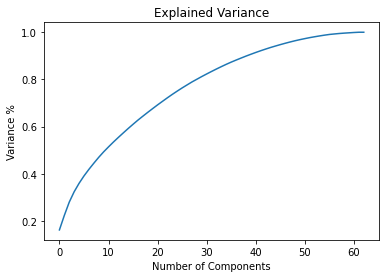

In [113]:
from sklearn.decomposition import PCA
pca = PCA()
principleComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

60 components od the dataset explain around 95% variance in output/target

# Selecting Kbest Features

In [114]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [115]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(65,'Score'))

         Feature     Score
14   OverallQual  5.303071
22     ExterQual  3.404921
25      BsmtQual  2.882415
44   KitchenQual  2.809819
50    GarageCars  2.611142
..           ...       ...
30  BsmtFinType2  0.823425
10    Condition1  0.803848
46    Functional  0.797839
11    Condition2  0.782965
58      SaleType  0.778011

[62 rows x 2 columns]


In [116]:
#Dropping some least important columns from the dataset
X = X.drop(['SaleType'],axis=1)
X = X.drop(["Condition2"],axis=1)

# Checking for multicolinearity issue in test dataset using VIF:

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      14.475311            MSSubClass
1       1.890484              MSZoning
2       2.303786           LotFrontage
3       4.357383               LotArea
4       1.514741                Street
..           ...                   ...
59      1.588274              SaleType
60      1.655661         SaleCondition
61     13.169717       Year_SinceBuilt
62      4.535555  Year_SinceRemodAdded
63      1.274181        Year_SinceSold

[64 rows x 2 columns]

We can observe that GrLivArea has high VIF. We can drop this columnn to reduce the impact of multicollinearity in the dataset

In [118]:
#Droping high VIF columns
X_1 = X_1.drop(["GrLivArea"],axis=1)

We have dropped the GrLivArea column

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      14.349058            MSSubClass
1       1.890370              MSZoning
2       2.287276           LotFrontage
3       4.357165               LotArea
4       1.509447                Street
..           ...                   ...
58      1.582885              SaleType
59      1.635199         SaleCondition
60     12.846802       Year_SinceBuilt
61      4.514637  Year_SinceRemodAdded
62      1.274163        Year_SinceSold

[63 rows x 2 columns]

Although there are few columns in the dataset with high VIF than expected, we cannot drop them from the dataset without knowing their importance for the target/ dependent variable, so the multicolinearity issue is solved in train dataset upto some extent.

In [120]:
#Dropping some least important columns from the dataset as we dropped them from the train dataset
X_1 = X_1.drop(['SaleType'],axis=1)
X_1 = X_1.drop(["Condition2"],axis=1)

Now let us check the shape of both the train data and the test data after cleaning and feature engineering 

In [121]:
X.head

<bound method NDFrame.head of       MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0       1.508301 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1      -0.877042 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2       0.077095 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3      -0.877042 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4      -0.877042 -0.021646     0.039092  1.497522  0.058621 -1.373107   
...          ...       ...          ...       ...       ...       ...   
1163   -0.877042 -0.021646     0.039092  0.088869  0.058621 -1.373107   
1164   -0.877042 -0.021646    -0.173862 -0.169301  0.058621  0.752055   
1165    2.462438 -0.021646    -2.469737 -2.422001  0.058621  0.752055   
1166    0.315629 -4.762117    -1.081534 -0.240685  0.058621  0.752055   
1167    0.077095 -0.021646     0.039092 -0.410304  0.058621 -1.373107   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  BldgType  \
0        0.318

In [122]:
X_1.head

<bound method NDFrame.head of      MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0     -0.856054 -0.287006     0.981605  0.842656  0.083045 -1.402669   
1      1.431981 -0.287006     0.000000 -0.739104  0.083045 -1.402669   
2     -0.856054 -0.287006     0.000000  0.524304  0.083045  0.745474   
3      0.287963 -0.287006     0.429998  0.548484  0.083045  0.745474   
4      0.059160 -0.287006     0.981605  0.897263  0.083045 -1.402669   
..          ...       ...          ...       ...       ...       ...   
287   -0.856054 -0.287006     0.580436  0.260474  0.083045  0.745474   
288   -0.856054 -0.287006    -0.472632  0.084663  0.083045 -0.686621   
289   -0.856054 -0.287006     0.000000  0.432254  0.083045 -1.402669   
290   -0.169644  1.808136    -0.823655 -1.006703  0.083045  0.745474   
291    2.347195  1.808136    -2.277892 -2.671270  0.083045  0.745474   

     LandContour  LotConfig  LandSlope  Neighborhood  Condition1  BldgType  \
0      -2.566101  -2.001106

In [123]:
#Checking the shape of X in train data
X.shape

(1168, 61)

In [124]:
#Checking the shape of X in test data
X_1.shape

(292, 61)

Both have equal no of columns so we can proceed further with model training

# MODEL BUILDING USING TRAIN DATASET:

## Finding Best Random State and Accuracy:

In [125]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [126]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8970199276146686  on Random_state  135


We got the best accuracy and random state.

In [127]:
#Creating train test split.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [128]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [129]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.16594867634333
mean_squared_error: 697265553.4262236
mean_absolute_error: 17943.355584045585
root_mean_squared_error: 26405.786362580147

Cross validation score : 83.30969009774746

R2_Score - Cross Validation Score : 6.85625857859587


RandomForestRegressor is giving 90.16% r2_score.

# ii) XGBRegressor:

In [130]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.05330843419725
mean_squared_error: 776155289.5757599
mean_absolute_error: 18837.595419337606
root_mean_squared_error: 27859.563700384108

Cross validation score : 82.96508465130863

R2_Score - Cross Validation Score : 6.088223782888619


XGBRegressor is giving me 89.05% r2_score.

# iii) ExtraTreesRegressor:

In [131]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.77777277848213
mean_squared_error: 653885276.3525132
mean_absolute_error: 18255.776837606838
root_mean_squared_error: 25571.180581907305

Cross validation score : 84.20795650082964

R2_Score - Cross Validation Score : 6.569816277652492


ExtraTreesRegressor is giving me 90.77% r2_score.

# iv) GradientBoostingRegressor:

In [132]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 92.61544087501179
mean_squared_error: 523588756.6202963
mean_absolute_error: 16541.66888900152
root_mean_squared_error: 22882.061896173087

Cross validation score : 83.28210650205293

R2_Score - Cross Validation Score : 9.33333437295886


GradientBoostingRegressor is giving me 92.61% r2_score.

# v) DecisionTreeRegressor:

In [133]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 73.7654809357102
mean_squared_error: 1860110940.2621083
mean_absolute_error: 29436.76923076923
root_mean_squared_error: 43129.003469383664

Cross validation score : 62.99222177821948

R2_Score - Cross Validation Score : 10.77325915749072


DecisionTreeRegressor is giving me 73.76% r2_score.

After observing the difference of model accuracy and cross validation score we can see RandomForestRegressor as the best model.

# Hyper parameter tunning for best model:

In [134]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [135]:
parameter = {'n_estimators':[30,60,80],
             'max_depth': [10,20,40],
             'min_samples_leaf':[1,2,5,10,20,30],
             'min_samples_split':[5,10,20],
             'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}


In [136]:
# Giving RFR parameters
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [137]:
#Running grid search CV for RFR.
GCV.fit(X_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

Tuning the model using GCV.

In [138]:
#Getting the best parameters
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

Got the best parameters for RFR.

In [139]:
# Assigning a variable for the best model
Best_mod=RandomForestRegressor(criterion='mae',max_features='sqrt',min_samples_split=5,n_estimators=60,max_depth= 10, min_samples_leaf= 1)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.24134955874074
mean_squared_error: 762822575.0660958
mean_absolute_error: 18537.213319088318
RMSE value: 27619.242840202838


This is the model r2_score after tuning. We have 89.24% as r2_score which is good to proceed with.

# Saving the model:

In [140]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"House_Price.pkl")

['House_Price.pkl']

We have saved the model as House_Price.Using .pkl

## Predicting House Price for test dataset using Saved model of train dataset:

In [141]:
# Loading the saved model
model=joblib.load("House_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([145841.125     , 153632.6       , 169143.16666667, 261018.09166667,
       103341.075     , 267955.39166667, 184268.3       , 124148.81666667,
       139742.08333333, 113145.34166667,  89805.83333333, 143810.025     ,
       252080.35833333, 162553.53333333, 139033.33333333, 181588.66666667,
       184987.775     , 170839.25833333, 288342.58333333, 164203.03333333,
       137665.175     , 154953.40833333, 133481.01666667, 290673.96666667,
       121808.98333333, 145160.025     , 240658.84166667, 229211.53333333,
       106231.26666667, 156118.3       , 178086.71666667, 129372.28333333,
       195948.38333333, 121137.15      , 165014.56666667, 159123.58333333,
       275134.09166667, 126673.48333333, 117400.96666667, 150461.95833333,
       297883.69166667, 183427.83333333, 405768.23333333,  80559.58333333,
       109345.61666667, 281538.975     , 133815.41666667, 298696.78333333,
       239190.53333333, 137661.94166667, 150739.66666667, 116842.01666667,
       191861.91666667, 1

In [142]:
#Creating a dataframe of actual vs predicted values
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0         1              2              3           4    \
Predicted  145841.125  153632.6  169143.166667  261018.091667  103341.075   
Actual     120000.000  140000.0  172500.000000  244600.000000   88000.000   

                     5         6              7              8    \
Predicted  267955.391667  184268.3  124148.816667  139742.083333   
Actual     252000.000000  176000.0  124900.000000  120000.000000   

                     9             10          11             12   \
Predicted  113145.341667  89805.833333  143810.025  252080.358333   
Actual      87000.000000  37900.000000  146000.000  270000.000000   

                     13             14             15          16   \
Predicted  162553.533333  139033.333333  181588.666667  184987.775   
Actual     177500.000000  129000.000000  174000.000000  185900.000   

                     17             18             19          20   \
Predicted  170839.258333  288342.583333  164203.033333  137665.175   
Actual     163000.000000  340000.000000  169000.000000  110500.000   

                     21             22             23             24   \
Predicted  154953.408333  133481.016667  290673.966667  121808.983333   
Actual     142500.000000  138500.000000  290000.000000  110000.000000   

                  25             26             27             28        29   \
Predicted  145160.025  240658.841667  229211.533333  106231.266667  156118.3   
Actual     148500.000  237000.000000  245500.000000   85000.000000  141000.0   

                     30             31             32         33   \
Predicted  178086.716667  129372.283333  195948.383333  121137.15   
Actual     172785.000000  128900.000000  168000.000000  115000.00   

                     34             35             36             37   \
Predicted  165014.566667  159123.583333  275134.091667  126673.483333   
Actual     140000.000000  148800.000000  302000.000000  126175.000000   

                     38             39             40             41   \
Predicted  117400.966667  150461.958333  297883.691667  183427.833333   
Actual     106500.000000  145500.000000  285000.000000  174000.000000   

                     42            43             44          45   \
Predicted  405768.233333  80559.583333  109345.616667  281538.975   
Actual     556581.000000  39300.000000   96500.000000  239000.000   

                     46             47             48             49   \
Predicted  133815.416667  298696.783333  239190.533333  137661.941667   
Actual     138500.000000  475000.000000  233230.000000  124000.000000   

                     50             51             52         53   \
Predicted  150739.666667  116842.016667  191861.916667  111308.25   
Actual     144500.000000  119750.000000  181000.000000   85000.00   

                     54             55          56             57        58   \
Predicted  206845.108333  153407.041667  219597.125  127186.866667  375809.6   
Actual     250000.000000  155000.000000  237000.000  114500.000000  380000.0   

                     59         60             61             62   \
Predicted  293947.633333  137646.95  164074.166667  189651.166667   
Actual     278000.000000  140000.00  139000.000000  176000.000000   

                     63             64         65             66   \
Predicted  137350.241667  178699.216667  188758.75  228629.416667   
Actual     177000.000000  167000.000000  170000.00  190000.000000   

                     67             68             69             70   \
Predicted  234886.666667  200557.366667  111298.091667  123513.541667   
Actual     260400.000000  187500.000000   80000.000000  120500.000000   

                     71             72             73             74   \
Predicted  107758.683333  359464.366667  149740.158333  167026.641667   
Actual     135000.000000  345000.000000  140000.000000  145000.000000   

                 75             76          77         78             79   \
Predicted  302276.05  178214.916

Above are the predicted values and the actual values.They look similar.

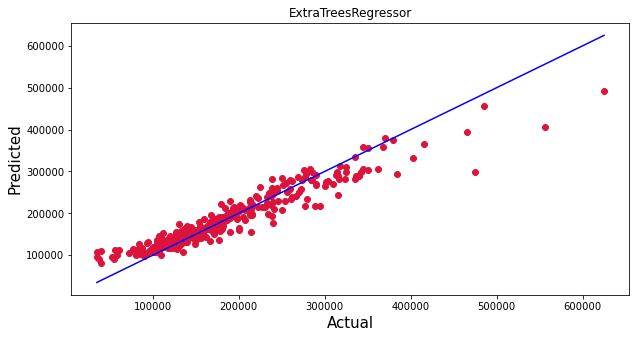

In [143]:
#Plotting the actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted. To get better insights. Blue line is the actual line and red dots are the predicted values. They are similar apart from few exceptions

In [144]:
#Predicting Sale price of house using cleaned test dataset
Predicted_Sale_Price = model.predict(X_1)
Predicted_Sale_Price

array([333514.71666667, 207490.45833333, 263353.08333333, 168859.08333333,
       231665.95      , 100991.81666667, 149590.1       , 342609.50833333,
       251212.70833333, 171025.23333333,  94825.41666667, 146324.16666667,
       137081.26666667, 196397.24166667, 315492.725     , 132853.23333333,
       122717.9       , 132408.08333333, 169153.56666667, 179769.06666667,
       144598.16666667, 156948.38333333, 154765.7       , 102235.83333333,
       116013.225     , 130087.65833333, 178888.3       , 149972.74166667,
       177149.58333333, 118084.16666667, 130526.95      , 209770.28333333,
       231387.775     , 168014.83333333, 128293.78333333, 178418.55833333,
       192686.1       , 120821.375     , 155257.83333333, 142431.50833333,
       117053.25833333, 282313.95      , 208979.475     , 194211.95833333,
       160259.00833333, 126134.16666667, 134855.61666667, 113627.16666667,
       205868.90833333, 345052.16666667, 149901.01666667, 201000.4       ,
       109074.93333333, 1

In [145]:
#Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  333514.716667
1  207490.458333
2  263353.083333
3  168859.083333
4  231665.950000
5  100991.816667
6  149590.100000
7  342609.508333
8  251212.708333
9  171025.233333

In [146]:
#Saving the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

We have saved the predicted values as csv file.